## **Investigating COVID Vaccination vs Mortality Data**

## Dataset Description

In this Notebook, the group will be investigating a Kaggle dataset titled, **[“COVID vaccination vs. mortality”](https://www.kaggle.com/datasets/sinakaraji/covid-vaccination-vs-death/)**. This dataset contains information related to **the number of COVID-19 vaccinations** and **the number of new deaths due to COVID-19**, with the goal of identifying the impact of vaccination on the number of new deaths.

The global COVID-19 outbreak has claimed over 4.5 million lives as of the dataset’s creation and it is imperative **to comprehend the effectiveness of vaccination in mitigating COVID-related deaths**. This dataset serves to facilitate research and analysis, offering insights into the correlation between vaccination efforts and the reduction of mortality associated with the virus.

## Data Collection

The data collection method for generating conclusions and insights from this dataset involves the integration of three datasets: **[COVID-19 World Vaccination Progress](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)**, **[WHO COVID-19 Global Data](https://covid19.who.int/WHO-COVID-19-global-data.csv)**, and **[2021 World Population](https://www.kaggle.com/rsrishav/world-population)**.

Data for the **["COVID-19 World Vaccination Progress"](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress)** dataset is collected from the **[Our World in Data GitHub](https://github.com/owid/covid-19-data)** repository dedicated to COVID-19, a dataset that encompasses comprehensive country-level vaccination data. The process involves merging this vaccination data with location-specific information, including sources of vaccination. This dataset benefits from the rigorous compilation of data by **["Our World in Data"](https://ourworldindata.org/)**, which aggregates information from various reliable sources worldwide, providing a comprehensive view of global vaccination efforts.

Meanwhile, the **["WHO COVID-19 Global Data"](https://covid19.who.int/WHO-COVID-19-global-data.csv)** dataset encompasses a multifaceted approach to data collection. Its data has been compiled globally through WHO region-specific dashboards and aggregate count data reported to WHO headquarters daily. In addition, the dataset offers weekly updates on vaccine introduction and administration by countries, territories, and areas. These updates are sourced from numerous channels, including direct reports from Member States, WHO's review of publicly available official data, and data published by third-party sites like **["Our World in Data"](https://ourworldindata.org/)**.

Lastly, the **["2021 World Population"](https://www.kaggle.com/rsrishav/world-population)** dataset draws primarily from the **[World Population Review](https://worldpopulationreview.com/)** as its data source. This source, in turn, obtains its data from the **["U.S. Census Bureau's world population clock"](https://www.census.gov/popclock/world)**, which is derived from the U.S. Census Bureau's International Database (demographic data) and USA Trade Online (trade data). The population estimates and projections within this dataset are constructed using a wealth of data sources, including censuses, surveys, administrative records, and vital statistics. One of the primary resources for these estimates and projections is national statistical offices from various countries. These projections are meticulously crafted based on data for fertility, mortality, international migration, and major demographic shifts stemming from events such as diseases, conflicts, disasters, and other complex humanitarian crises.


## Importing Libraries

For the case study, **`numpy`**, **`pandas`**, **`matplotlib`**, **`scipy.stats`** will be used. These are software libraries and modules used for data manipulation, data analysis, data visualization, and statistical operations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## The Dataset

The case study will make use of a dataset called **`covid`**. This dataset contains 32911 rows of COVID-19 vaccination data and new daily mortalities of different countries from select dates in 2021-2022.

The dataset is provided as a **`.csv`** file.

In [2]:
covid_df = pd.read_csv("covid-vaccination-vs-death_ratio.csv")

## Dataset Structure

Opening the `.csv` file, the dataset is structured as a tabular format with rows and columns. Each row represents COVID-19 vaccination and death data of a specific country on a particular day, and each column corresponds to different variables associated with that country.

There are over 32911 **observations** across 10 **variables** in the dataset. The variables in the dataset are as follows:

- **`Unnamed: 0`**: ID of each observation
- **`country`**: names of the countries included in the dataset
- **`iso_code`**: the standardized country code (ISO) for each country
- **`date`**: the date for which the data is recorded
- **`total_vaccinations`**: represents the total number of COVID-19 vaccine doses administered in each country
- **`people_vaccinated`**: indicates the number of people in each country who have received at least one shot of a COVID-19 vaccine
- **`people_fully_vaccinated`**: indicates the number of people in each country who have received the full course of COVID-19 vaccine shots
- **`New_deaths`**: number of daily new deaths in each country due to COVID-19.
- **`population`**: the population of each country in the year 2021
- **`ratio`**: represents the percentage of the population in each country that has been vaccinated at the given date, calculated as `date = (people_vaccinated/population) * 100`


## Reading the Dataset

Now that the dataset has been imported, the info of the dataset can be seen by using the function `info()`.

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


As seen in the output, the data looks to be clean. The non-null count for every variable matches, meaning that there are no missing columns for a specific entry. To ensure that the dataset is clean, further investigation must be done.

## Data Cleaning

By checking for the number of times a country is mentioned using `value_counts()`, the number of entries a specific country has can be seen. Ideally, each country should have a similar number of entries with each other.

In [4]:
covid_df['country'].value_counts()

United States of America       471
Israel                         466
Switzerland                    463
Germany                        458
Estonia                        458
                              ... 
Tuvalu                           4
Niue                             4
Turkmenistan                     3
Falkland Islands (Malvinas)      2
Tokelau                          1
Name: country, Length: 197, dtype: int64

As seen, there is a significant difference between the number of entries per country. The country with the most number of entries, the United States of America, has 471. Meanwhile, the country Tokelau only has 1. It would be impossible to clean the data by getting the average of the dates since there are countries with too few entries that cannot be stretched to ~400 entries without becoming inaccurate.

## Identifying the Scope

Since the dataset cannot be cleaned by ensuring all the countries have an entry for every date that has been recorded, a different approach is needed. In this case, the group decided to try comparing specific countries instead.

For the case study, the group decided to focus on Southeast Asian countries. This can be done by identifying the countries in Southeast Asia and filtering the dataset using attributes such as `country` or `iso_code` with the `isin` function.

In [5]:
# An array containing the ISO code of every Southeast Asian country.
se_asia = ["BRN", "MMR", "KHM", "TLS", "IDN", "LAO", "MYS", "PHL", "SGP", "THA", "VNM"]
# Creating a filtered dataset containing only SEA countries from the original dataset.
covid_se_df = covid_df[covid_df["iso_code"].isin(se_asia)]
covid_se_df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
4409,4409,Brunei Darussalam,BRN,2021-04-26,12947.0,12842.0,105.0,0,443903.0,2.892974
4410,4410,Brunei Darussalam,BRN,2021-04-27,13485.0,13363.0,122.0,0,443903.0,3.010342
4411,4411,Brunei Darussalam,BRN,2021-04-28,14126.0,13898.0,228.0,0,443903.0,3.130864
4412,4412,Brunei Darussalam,BRN,2021-04-29,14876.0,14526.0,350.0,0,443903.0,3.272337
4413,4413,Brunei Darussalam,BRN,2021-05-03,15905.0,15043.0,862.0,0,443903.0,3.388803
...,...,...,...,...,...,...,...,...,...,...
32435,32435,Viet Nam,VNM,2022-03-18,201566460.0,79690136.0,77674112.0,76,98655916.0,80.775831
32436,32436,Viet Nam,VNM,2022-03-19,201660445.0,79693650.0,77677923.0,57,98655916.0,80.779393
32437,32437,Viet Nam,VNM,2022-03-20,201828138.0,79696647.0,77686643.0,77,98655916.0,80.782431
32438,32438,Viet Nam,VNM,2022-03-21,202029331.0,79701388.0,77696920.0,63,98655916.0,80.787236


By making an array of all the Southeast Asian countries, the entries can be filtered out by only including entries that match the countries in the array. ISO codes of the countries were used instead of the country names because country names can be varied depending on the source (e.g. "Vietnam" is written as "Viet Nam" in the dataset).

With the filtered dataset ready, the next step is to identify the number of entries of the Southeast Asian countries using `value_counts`.

In [6]:
covid_se_df['country'].value_counts()

Singapore                           448
Malaysia                            399
Cambodia                            385
Indonesia                           373
Thailand                            345
Viet Nam                            172
Brunei Darussalam                   154
Lao People's Democratic Republic     88
Philippines                          82
Myanmar                              37
Name: country, dtype: int64

The countries with the top 5 number of entries are Singapore (448), Malaysia (399), Cambodia (385), Indonesia (374), Thailand (345).

With this in mind, the case study will focus on investigating Singapore, Malaysia, and Indonesia. This is due to them having some of the most number of entries in the dataset. Furthermore, these countries have a similar culture and a close geography, making it an interesting case to investigate the differences in their COVID-19 vaccination and deaths.

## Investigating Indonesia, Malaysia, and Singapore

To analyze the COVID-19 data of Indonesia, Malaysia, and Singapore, similar steps must first be followed when it comes to filtering the dataset.

This means getting their ISO code (**IDN**, **MYS**, **SGP**) to filter out the dataset.

In [7]:
# DataFrame for Indonesia, Malaysia, and Singapore
sample_countries = ["IDN", "MYS", "SGP"]
sample_df = covid_se_df[covid_se_df["iso_code"].isin(sample_countries)]
sample_df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
13372,13372,Indonesia,IDN,2021-01-28,373786.0,368318.0,5468.0,476,278037263.0,0.132471
13373,13373,Indonesia,IDN,2021-01-29,416299.0,405012.0,11287.0,187,278037263.0,0.145668
13374,13374,Indonesia,IDN,2021-01-30,502955.0,482145.0,20810.0,210,278037263.0,0.173410
13375,13375,Indonesia,IDN,2021-01-31,515681.0,493133.0,22548.0,270,278037263.0,0.177362
13376,13376,Indonesia,IDN,2021-02-01,574938.0,539532.0,35406.0,279,278037263.0,0.194050
...,...,...,...,...,...,...,...,...,...,...
26733,26733,Singapore,SGP,2022-03-24,13787281.0,5004025.0,4952411.0,6,5925135.0,84.454194
26734,26734,Singapore,SGP,2022-03-25,13798265.0,5004537.0,4955615.0,6,5925135.0,84.462835
26735,26735,Singapore,SGP,2022-03-26,13809670.0,5005059.0,4959603.0,13,5925135.0,84.471645
26736,26736,Singapore,SGP,2022-03-27,13817599.0,5005383.0,4962492.0,7,5925135.0,84.477113


For convenience during the data analysis, each of the three countries will have an assigned `DataFrame`.

In [8]:
# DataFrame for Indonesia
idn_df = sample_df[sample_df["iso_code"] == "IDN"]
idn_df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
13372,13372,Indonesia,IDN,2021-01-28,373786.0,368318.0,5468.0,476,278037263.0,0.132471
13373,13373,Indonesia,IDN,2021-01-29,416299.0,405012.0,11287.0,187,278037263.0,0.145668
13374,13374,Indonesia,IDN,2021-01-30,502955.0,482145.0,20810.0,210,278037263.0,0.173410
13375,13375,Indonesia,IDN,2021-01-31,515681.0,493133.0,22548.0,270,278037263.0,0.177362
13376,13376,Indonesia,IDN,2021-02-01,574938.0,539532.0,35406.0,279,278037263.0,0.194050
...,...,...,...,...,...,...,...,...,...,...
13740,13740,Indonesia,IDN,2022-03-22,368133995.0,194906900.0,155391750.0,170,278037263.0,70.100999
13741,13741,Indonesia,IDN,2022-03-23,369859000.0,195229531.0,156139516.0,159,278037263.0,70.217038
13742,13742,Indonesia,IDN,2022-03-24,370188943.0,195366825.0,156336412.0,122,278037263.0,70.266418
13743,13743,Indonesia,IDN,2022-03-28,375911010.0,195958039.0,157974507.0,104,278037263.0,70.479056


In [9]:
# DataFrame for Malaysia
mys_df = sample_df[sample_df["iso_code"] == "MYS"]
mys_df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
18817,18817,Malaysia,MYS,2021-02-24,66.0,63.0,3.0,14,33015425.0,0.000191
18818,18818,Malaysia,MYS,2021-02-25,1217.0,1212.0,5.0,12,33015425.0,0.003671
18819,18819,Malaysia,MYS,2021-02-26,5288.0,5280.0,8.0,12,33015425.0,0.015993
18820,18820,Malaysia,MYS,2021-02-27,12004.0,11990.0,14.0,11,33015425.0,0.036316
18821,18821,Malaysia,MYS,2021-02-28,18724.0,18705.0,19.0,10,33015425.0,0.056655
...,...,...,...,...,...,...,...,...,...,...
19211,19211,Malaysia,MYS,2022-03-25,68647915.0,27463766.0,25796241.0,64,33015425.0,83.184651
19212,19212,Malaysia,MYS,2022-03-26,68680477.0,27477329.0,25797278.0,53,33015425.0,83.225732
19213,19213,Malaysia,MYS,2022-03-27,68705384.0,27484120.0,25798167.0,34,33015425.0,83.246301
19214,19214,Malaysia,MYS,2022-03-28,68747449.0,27488817.0,25799967.0,37,33015425.0,83.260527


In [10]:
# DataFrame for Singapore
sgp_df = sample_df[sample_df["iso_code"] == "SGP"]
sgp_df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
26290,26290,Singapore,SGP,2021-01-05,187.0,185.0,2.0,0,5925135.0,0.003122
26291,26291,Singapore,SGP,2021-01-06,200.0,196.0,4.0,0,5925135.0,0.003308
26292,26292,Singapore,SGP,2021-01-07,218.0,212.0,6.0,0,5925135.0,0.003578
26293,26293,Singapore,SGP,2021-01-08,950.0,941.0,9.0,0,5925135.0,0.015881
26294,26294,Singapore,SGP,2021-01-09,1352.0,1341.0,11.0,0,5925135.0,0.022632
...,...,...,...,...,...,...,...,...,...,...
26733,26733,Singapore,SGP,2022-03-24,13787281.0,5004025.0,4952411.0,6,5925135.0,84.454194
26734,26734,Singapore,SGP,2022-03-25,13798265.0,5004537.0,4955615.0,6,5925135.0,84.462835
26735,26735,Singapore,SGP,2022-03-26,13809670.0,5005059.0,4959603.0,13,5925135.0,84.471645
26736,26736,Singapore,SGP,2022-03-27,13817599.0,5005383.0,4962492.0,7,5925135.0,84.477113


With the 3 sample countries (Indonesia, Malaysia, Singapore) separated into individual dataframes, they can now be compared when needed in the exploratory data analysis.

## Exploratory Data Analysis

Although the scope is only among 3 countries, dataframes `sample_df`, `idn_df`, `mys_df`, and `sgp_df` still contain a significant amount of information. With this in mind, some questions can be asked to gain further insights about the data.

### Which country has the most dates recorded?

To answer the question, the variables of interest are:
- **`country`**: names of the countries included in the dataset
- **`iso_code`**: the standardized country code (ISO) for each country

Either variables can be used to identify the country associated with an observation, which can be done by using the `value_counts` function.

In [11]:
sample_counts = sample_df["country"].value_counts()
sample_counts

Singapore    448
Malaysia     399
Indonesia    373
Name: country, dtype: int64

In [12]:
sample_counts = sample_df["iso_code"].value_counts()
sample_counts

SGP    448
MYS    399
IDN    373
Name: iso_code, dtype: int64

These results can be further visualized with a bar graph, which can be done using the `bar` function.

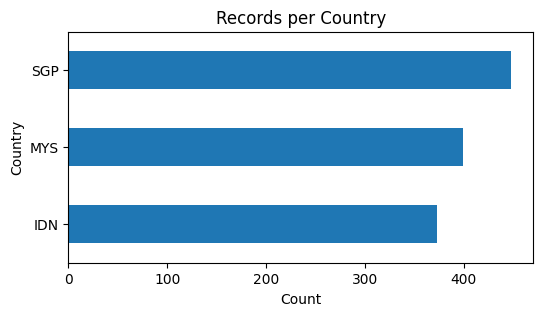

In [13]:
sample_counts.plot.barh(figsize=(6,3)).invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Records per Country')
plt.show()

As seen in the graph and the count, **Singapore** (**448**) has the most dates recorded, with **Malaysia** (**399**) and **Indonesia** (**373**) coming second and third respectively.

### What is the distribution of  logs recorded for each country throughout the months?

To further analyze those numbers, it could be useful to identify the number of observations recorded per month in each country. This would help identify the timespan that should be considered when analyzing the data.

Before visualizing the spread, ensure that `date` is a `datetime` variable, as this would allow the libraries to read it as an actual date rather than a string.

In [14]:
sample_df["date"].dtypes

dtype('O')

Since the `date` attribute is an `object` data type, these columns have to be converted first with the `pandas` function `to_datetime`.

In [15]:
# Making a copy to preserve the original data
dated_idn_df = idn_df.copy()
dated_mys_df = mys_df.copy()
dated_sgp_df = sgp_df.copy()

# Converting 'date' columns to datetime
dated_idn_df['date'] = pd.to_datetime(dated_idn_df['date'])
dated_mys_df['date'] = pd.to_datetime(dated_mys_df['date'])
dated_sgp_df['date'] = pd.to_datetime(dated_sgp_df['date'])

Once converted, it is now possible to analyze `date` as a range of actual dates.

Considering that the question pertains to the spread of the logs throughout the months, it is important to aggregate some statistical measures such as the mean, median, and mode.

To start, consider using the `groupby` and `to_period` function to group each date by month.

In [16]:
# Grouping by Indonesian logs by YYYY-MM
grouped_idn = dated_idn_df.groupby(dated_idn_df['date'].dt.to_period('M')).size().reset_index(name='count')
grouped_idn

,date,count
0,2021-01,4
1,2021-02,24
2,2021-03,26
3,2021-04,30
4,2021-05,31
5,2021-06,30
6,2021-07,31
7,2021-08,31
8,2021-09,30
9,2021-10,31


In [17]:
# Grouping by Malaysian logs by YYYY-MM
grouped_mys = dated_mys_df.groupby(dated_mys_df['date'].dt.to_period('M')).size().reset_index(name='count')
grouped_mys

,date,count
0,2021-02,5
1,2021-03,31
2,2021-04,30
3,2021-05,31
4,2021-06,30
5,2021-07,31
6,2021-08,31
7,2021-09,30
8,2021-10,31
9,2021-11,30


In [18]:
# Grouping by Singaporean logs by YYYY-MM
grouped_sgp = dated_sgp_df.groupby(dated_sgp_df['date'].dt.to_period('M')).size().reset_index(name='count')
grouped_sgp

,date,count
0,2021-01,27
1,2021-02,28
2,2021-03,31
3,2021-04,30
4,2021-05,31
5,2021-06,30
6,2021-07,31
7,2021-08,31
8,2021-09,30
9,2021-10,31


With the dates grouped, they can now be aggregated to identify the average number of entries per month and their standard deviation.

In [19]:
# Aggregating Indonesian logs by YYYY-MM
agg_idn = grouped_idn.agg({"count": ["mean", "median", "std"]})
agg_idn

,count
mean,26.642857
median,30.000000
std,7.354822


In [20]:
# Aggregating Malaysian logs by YYYY-MM
agg_mys = grouped_mys.agg({"count": ["mean", "median", "std"]})
agg_mys

,count
mean,28.500000
median,30.500000
std,6.824729


In [21]:
# Aggregating Singaporean logs by YYYY-MM
agg_sgp = grouped_sgp.agg({"count": ["mean", "median", "std"]})
agg_sgp

,count
mean,29.866667
median,30.000000
std,1.407463


Based on the results, **Indonesia** has a **mean** of **26.64** and a **median** of **30**. This implies that it likely has a uniform distribution. On the other hand, its high **standard deviation** of **7.35** implies that there are possible outliers or irregularities affecting the mean.

A similar observation can be seen in **Malaysia**, although to a lesser extent. Its **mean** of **28.50** and **median** of **30.50** are much closer, implying that it is mostly uniform in distribution, while its **6.82 standard deviation** suggests similar issues as **Indonesia**.

Meanwhile, **Singapore** has a near equal **mean** and **median** for their values are **29.87** and **30** respectively, meaning their distribution is almost perfectly uniform. This can be further supported by its low **1.41 standard deviation**, which implies that most months have a near-similar number of entries recorded.

For further comparison, the number of entries will be visualized through a **histogram**, which can be accessed by using the `hist` function.

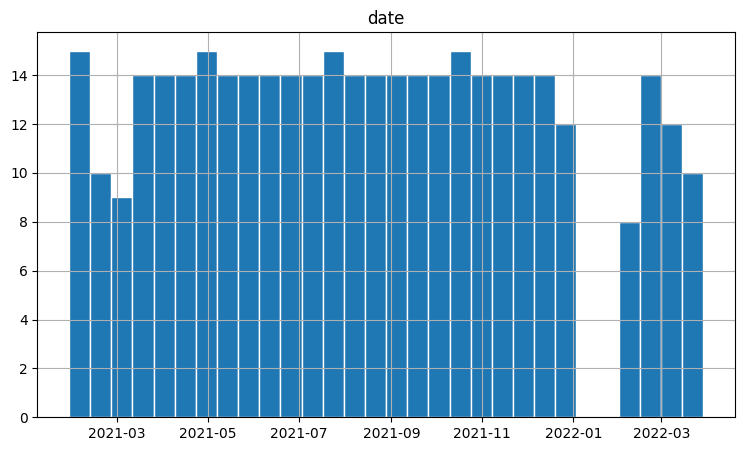

In [22]:
# Histogram for Indonesia
dated_idn_df.hist("date", bins=30, edgecolor='w', figsize=(9,5))
plt.show()

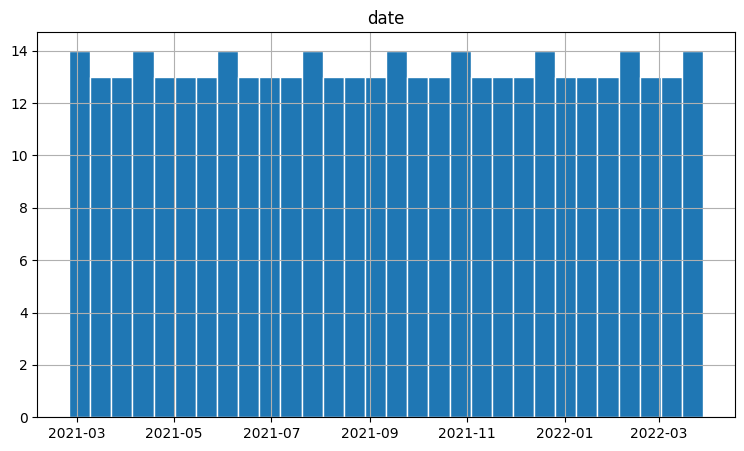

In [23]:
# Histogram for Malaysia
dated_mys_df.hist("date", bins=30, edgecolor='w', figsize=(9,5))
plt.show()

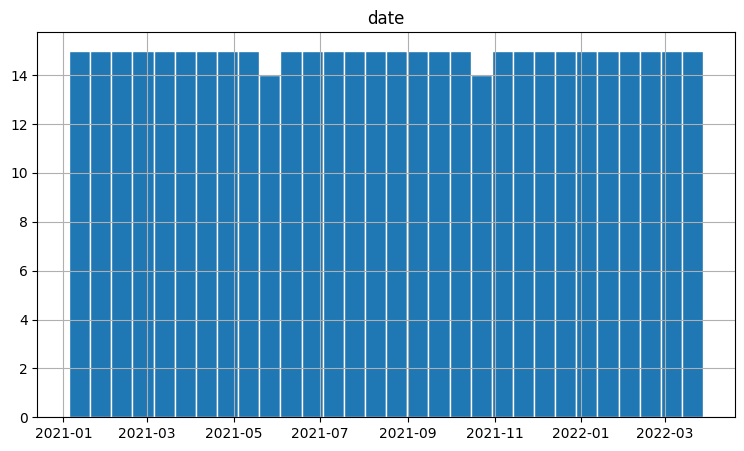

In [24]:
# Histogram for Singapore
dated_sgp_df.hist("date", bins=30, edgecolor='w', figsize=(9,5))
plt.show()

Looking at the histograms, it is clear that **Malaysia** and **Indonesia** lack data in certain days, as **Malaysia's** histogram only starts from `2021-03`, while **Indonesia** and **Singapore** starts much prior.

Furthermore, **Indonesia** also has no records at a period between `2022-01` and `2021-03`. With this in mind, it might be ideal to limit the scope between `2021-03` to `2022-01` when modelling the data, especially as the distribution of the three countries are mostly uniform outside of the aforementioned ranges with missing records.

### What is the distribution of new deaths per country?

Having identified the possible scope of the `date` to be used in the study, the next step is to find variables of interest, with `New_deaths` serving as an example.

To start, the `agg` function can be used to aggregate some summary statistics regarding `New_deaths`.

In [25]:
# Aggregating Indonesian deaths
agg_idn = idn_df.agg({"New_deaths": ["mean", "median", "std"]})
agg_idn

,New_deaths
mean,328.241287
median,170.000000
std,441.946727


In [26]:
# Aggregating Malaysian deaths
agg_mys = mys_df.agg({"New_deaths": ["mean", "median", "std"]})
agg_mys

,New_deaths
mean,84.661654
median,54.000000
std,98.463948


In [27]:
# Aggregating Singaporean deaths
agg_sgp = sgp_df.agg({"New_deaths": ["mean", "median", "std"]})
agg_sgp

,New_deaths
mean,2.716518
median,0.000000
std,4.408401


Given the following results, it is clear that **Singapore** has the least average number of deaths (**2.72**) in a day due to COVID-19, with **Malaysia** being second (**84.66**) and **Indonesia** having the highest average number of deaths (**328.24**) in a day.

Despite these results, it is also important to consider the **standard deviation** of the results, especially as the **mean** and **median** are very different from each other for all the three countries. To further visualize, it might be important to analyze their histograms to identify how skewed `New_deaths` is in these datasets.

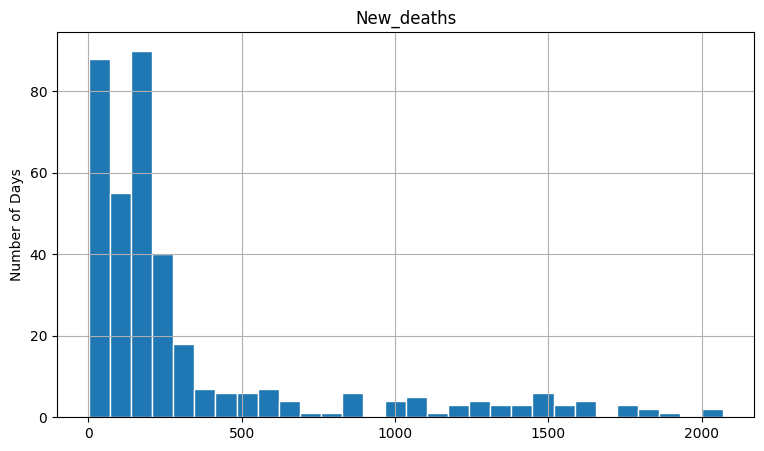

In [28]:
# New_deaths Histogram for Indonesia
dated_idn_df.hist("New_deaths", bins=30, edgecolor='w', figsize=(9,5))
plt.ylabel('Number of Days')
plt.show()

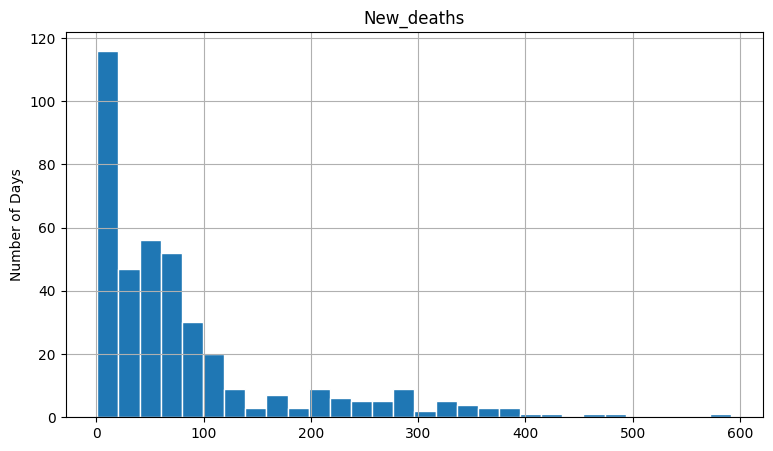

In [29]:
# New_deaths Histogram for Malaysia
dated_mys_df.hist("New_deaths", bins=30, edgecolor='w', figsize=(9,5))
plt.ylabel('Number of Days')
plt.show()

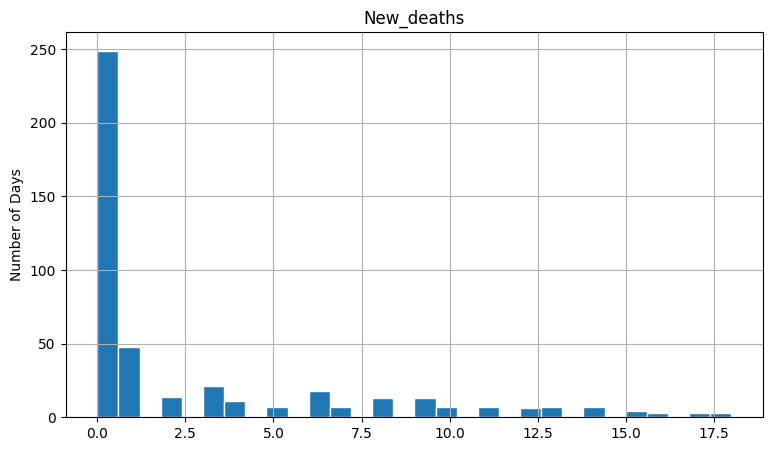

In [30]:
# New_deaths Histogram for Singapore
dated_sgp_df.hist("New_deaths", bins=30, edgecolor='w', figsize=(9,5))
plt.ylabel('Number of Days')
plt.show()

Looking at the results, it is clear that **Indonesia**, **Malaysia**, and **Singapore** all have positively-skewed distribution, with **Singapore** being an especially interesting case as a significant majority of its days has a value of `New_deaths = 0`.

Considering this, it is clear that further investigation will be needed to see the relation of `New_deaths` with other variables, as it may help identify why the data is distributed in the way it is currently presented.

### What is the trend of new deaths due to COVID-19 in 2021?

Before looking into the relation of `New_deaths` with some of the other variables, it would also best to first look into the trend of `New_deaths` over time in order to visually compare it with trends of other variables. This would mean creating a line graph for each country to visualize the trends. On the other hand, it is also important to connsider that the three countries likely have varied populations, making it vital to compare them through their **deaths to population ratio** (to be represented as **`Deaths_to_Population`**) in order to better normalize the data.

Another important factor to consider before getting the deaths to population ratio is the `population`, which was defined as the **population of the associated country in 2021**. Considering this, it would be best to only graph the logs from **2021**, as it might not be a good representation to also compute data from 2020 and 2022 with `population` whose values are limited to 2021.

In [31]:
# Filter data for the year 2021
idn_df_2021 = dated_idn_df[dated_idn_df['date'].dt.year == 2021].copy()
mys_df_2021 = dated_mys_df[dated_mys_df['date'].dt.year == 2021].copy()
sgp_df_2021 = dated_sgp_df[dated_sgp_df['date'].dt.year == 2021].copy()

Having created a copy of the datasets that only include the data from 2021, it is now possible to have a less biased and more accurate graph pertaining to `Deaths_to_Population`, whose value is equal to `(New_deaths`/`population) * 100`. Since `Death_to_Population` is not an existing column, simply assigning it with a value would insert the column to the datasets.

In [32]:
# Calculate the ratio of deaths to population for each country
sgp_df_2021['Deaths_to_Population'] = sgp_df_2021['New_deaths']*100 / sgp_df_2021['population']
idn_df_2021['Deaths_to_Population'] = idn_df_2021['New_deaths']*100 / idn_df_2021['population']
mys_df_2021['Deaths_to_Population'] = mys_df_2021['New_deaths']*100 / mys_df_2021['population']

# Display a portion of sgp_df_2021 as an example proving it has been inserted
sgp_df_2021.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,Deaths_to_Population
26290,26290,Singapore,SGP,2021-01-05,187.0,185.0,2.0,0,5925135.0,0.003122,0.0
26291,26291,Singapore,SGP,2021-01-06,200.0,196.0,4.0,0,5925135.0,0.003308,0.0
26292,26292,Singapore,SGP,2021-01-07,218.0,212.0,6.0,0,5925135.0,0.003578,0.0
26293,26293,Singapore,SGP,2021-01-08,950.0,941.0,9.0,0,5925135.0,0.015881,0.0
26294,26294,Singapore,SGP,2021-01-09,1352.0,1341.0,11.0,0,5925135.0,0.022632,0.0


Looking at `sgp_df_2021`, the `Deaths_to_Population` is clearly added as a new column in the dataset. Since the same process was done to `idn_df_2021` and `mys_df_2021`, it is expected that they would also have the column with their respective data. To further analyze the data, `agg` can also be used to identify the **mean**, **median**, and **standard deviation** of the variable for each country.

In [33]:
# Aggregating Indonesian deaths to population ratio in 2021
agg_idn = idn_df_2021.agg({"Deaths_to_Population": ["mean", "median", "std"]})
agg_idn

,Deaths_to_Population
mean,0.000124
median,0.000060
std,0.000168


In [34]:
# Aggregating Malaysian deaths to population ratio in 2021
agg_mys = mys_df_2021.agg({"Deaths_to_Population": ["mean", "median", "std"]})
agg_mys

,Deaths_to_Population
mean,0.000296
median,0.000185
std,0.000324


In [35]:
# Aggregating Singaporean deaths to population ratio in 2021
agg_sgp = sgp_df_2021.agg({"Deaths_to_Population": ["mean", "median", "std"]})
agg_sgp

,Deaths_to_Population
mean,0.000037
median,0.000000
std,0.000072


Looking at the `Deaths_to_Population` ratio, **Indonesia** has a mean of **0.000124**, median of **0.000060**, and standard deviation of **0.000168**, implying that the data is potentially skewed. Meanwhile, **Malaysia** has a mean of **0.000296**, median of **0.000185**, and standard deviation of **0.000324**, which is much higher than Indonesia. On the other hand, **Singapore** has a mean of **0.000037**, median of **0**, and standard deviation of **0.000072**, implying that they have relatively less deaths for to COVID-19 than **Indonesia** and **Malaysia**, even when considering the differences in **population**.

To further support these observations, a **line graph** can  be used to visualize the trend of **deaths to population ratio** due to COVID-19 throughout **2021**, which can be done with the `matplotlib` library and its `figure` and `plot` functions.

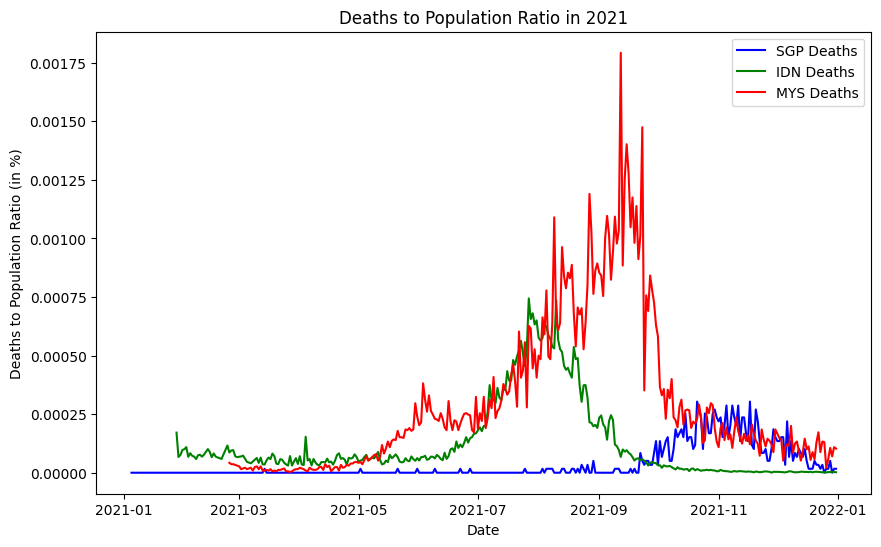

In [36]:
# Plot the ratio of deaths to population for all countries
plt.figure(figsize=(10, 6))

# Plot data for Singapore in blue
plt.plot(sgp_df_2021['date'], sgp_df_2021['Deaths_to_Population'], label='SGP Deaths', color='blue')

# Plot data for Indonesia in green
plt.plot(idn_df_2021['date'], idn_df_2021['Deaths_to_Population'], label='IDN Deaths', color='green')

# Plot data for Malaysia in red
plt.plot(mys_df_2021['date'], mys_df_2021['Deaths_to_Population'], label='MYS Deaths', color='red')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Deaths to Population Ratio (in %)')
plt.title('Deaths to Population Ratio in 2021')

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

Looking at the graph, there are notable differences between the COVID-19 deaths of Indonesia, Malaysia, and Singapore. Despite the higher **average number of deaths per day** of **Indonesia** (**328.24**) than **Malaysia** (**84.66**), Malaysia generally has a higher `Death_to_Population` ratio throughout 2021, which is further supported by the previous observations on their **means**.

Furthermore, it is also notable that there are certain periods where the `Death_to_Population` ratio would trend upwards and then go down, with some of the trends occuring at around similar periods. This may explain why the **standard deviation** of the three countries are much higher than the **mean**. With such observations, it is clear that additional analysis can be explored regarding this variable and the other variables in the datasets.

### What is the trend of vaccinations due to COVID-19 in 2021?

In addition to the trend of deaths within 2021, another important factor that can be considered in the case study is the **vaccination rate** (vaccinated to population ratio), which can be retrieved using the given variable `ratio`.

Similar to the `Death_to_Population` variable, a similar process will be done to statistically summarize and visualize its trend throughout 2021.

In [37]:
# Aggregating Indonesian vaccinated to population ratio in 2021
agg_idn = idn_df_2021.agg({"ratio": ["mean", "std"]})
agg_idn

,ratio
mean,20.331808
std,18.298695


In [38]:
# Aggregating Malaysian vaccinated to population ratio in 2021
agg_mys = mys_df_2021.agg({"ratio": ["mean", "std"]})
agg_mys

,ratio
mean,39.559622
std,32.605549


In [39]:
# Aggregating Singaporean vaccinated to population ratio in 2021
agg_sgp = sgp_df_2021.agg({"ratio": ["mean", "std"]})
agg_sgp

,ratio
mean,48.558395
std,30.706552


Looking at the results, **Indonesia** has the lowest average vaccination rate among the three countries, as its **20.33% vaccination rate** is lower than **39.56%** of **Malaysia** and especially the **48.56%** of **Singapore**.

Meanwhile, the results also show that the **standard deviation** of all three countries are large, which is understandable considering that the data is regarding the **vaccination rate**, which would always go up given a constant or declining population.

To better visualize the trend, a **line graph** will be used to track how the **vaccination rate** grew over time for the three countries.

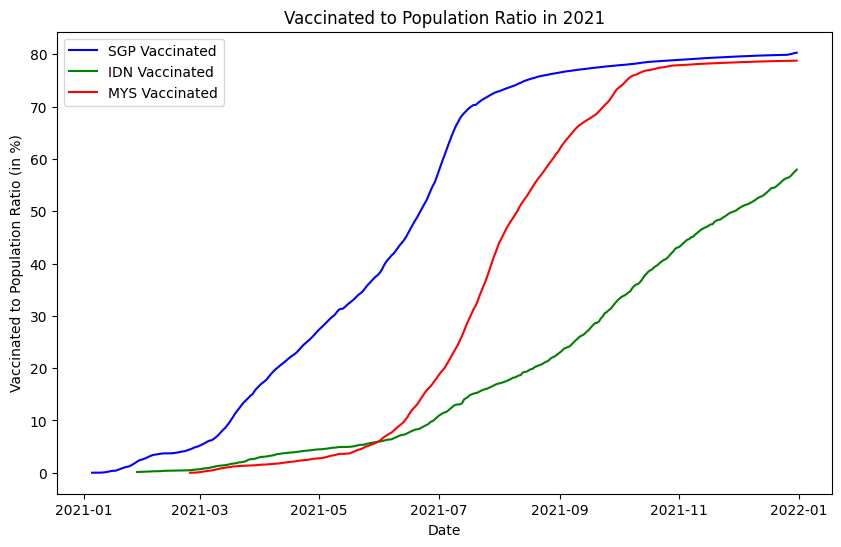

In [40]:
# Plot the ratio of vaccinated to population for all countries
plt.figure(figsize=(10, 6))

# Plot data for Singapore in blue
plt.plot(sgp_df_2021['date'], sgp_df_2021['ratio'], label='SGP Vaccinated', color='blue')

# Plot data for Indonesia in green
plt.plot(idn_df_2021['date'], idn_df_2021['ratio'], label='IDN Vaccinated', color='green')

# Plot data for Malaysia in red
plt.plot(mys_df_2021['date'], mys_df_2021['ratio'], label='MYS Vaccinated', color='red')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Vaccinated to Population Ratio (in %)')
plt.title('Vaccinated to Population Ratio in 2021')

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

Analyzing the graphs, it is clear that **Singapore** is ahead when it comes to vaccinating its population, with **Malaysia** becoming ahead of **Indonesia** some time between `2021-05` and `2021-07`. Furthermore another notable observation is that when comparing the graph to the one for death, **Malaysia** and **Indonesia** gain a parabolic rise in vaccinations around periods with the highest `Deaths_to_Population`, while **Singapore** remained mostly steady in `Deaths_to_Population` until `2021-09`, in which the growth of `ratio` has already started to plateau.

On the other hand, there is also the factor of `people_fully_vaccinated`, whose data and its relation to other variables may differ from `people_vaccinated`. Considering that, a similar process will be done to visualize the trend, in which the **ratio of fully vaccinated to population** represented as `Fully_Vaccinated_to_Population = (people_fully_vaccinated/population) * 100` will be graphed and analyzed for the **Indonesia**, **Malaysia**, and **Singapore**.

In [41]:
# Calculate the ratio of fully vaccinated to population for each country
sgp_df_2021['Fully_Vaccinated_to_Population'] = sgp_df_2021['people_fully_vaccinated']*100 / sgp_df_2021['population']
idn_df_2021['Fully_Vaccinated_to_Population'] = idn_df_2021['people_fully_vaccinated']*100 / idn_df_2021['population']
mys_df_2021['Fully_Vaccinated_to_Population'] = mys_df_2021['people_fully_vaccinated']*100 / mys_df_2021['population']

# Display sgp_df_2021 as an example proving it has been inserted
sgp_df_2021.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,Deaths_to_Population,Fully_Vaccinated_to_Population
26290,26290,Singapore,SGP,2021-01-05,187.0,185.0,2.0,0,5925135.0,0.003122,0.0,0.000034
26291,26291,Singapore,SGP,2021-01-06,200.0,196.0,4.0,0,5925135.0,0.003308,0.0,0.000068
26292,26292,Singapore,SGP,2021-01-07,218.0,212.0,6.0,0,5925135.0,0.003578,0.0,0.000101
26293,26293,Singapore,SGP,2021-01-08,950.0,941.0,9.0,0,5925135.0,0.015881,0.0,0.000152
26294,26294,Singapore,SGP,2021-01-09,1352.0,1341.0,11.0,0,5925135.0,0.022632,0.0,0.000186


Similar to `Deaths_to_Population`, `Fully_Vaccinated_to_Population` gets added as a column when assigned values. With the column ready as seen in the output for `sgp_df_2021`, it is now possible to visualize the trend, with the steps being the same as the `Deaths_to_Population` and `ratio`.

In [42]:
# Aggregating Indonesian fully vaccinated to population ratio in 2021
agg_idn = idn_df_2021.agg({"Fully_Vaccinated_to_Population": ["mean", "std"]})
agg_idn

,Fully_Vaccinated_to_Population
mean,12.348227
std,12.453458


In [43]:
# Aggregating Malaysian fully vaccinated to population ratio in 2021
agg_mys = mys_df_2021.agg({"Fully_Vaccinated_to_Population": ["mean", "std"]})
agg_mys

,Fully_Vaccinated_to_Population
mean,32.966865
std,31.731440


In [44]:
# Aggregating Singaporean fully vaccinated to population ratio in 2021
agg_sgp = sgp_df_2021.agg({"Fully_Vaccinated_to_Population": ["mean", "std"]})
agg_sgp

,Fully_Vaccinated_to_Population
mean,41.274693
std,30.287835


Understandably, the **mean** of every country is lower when it comes to `Fully_Vaccinated_to_Population` compared to `ratio`, as being vaccinated at least once is a prerequisite to being fully vaccinated.

Furthermore, their **standard deviations** are also relatively large compared to the **mean**, likely due to the same reasons as the one for `ratio`.

With these in mind, it would be important to also visualize the trend through a **line graph**.

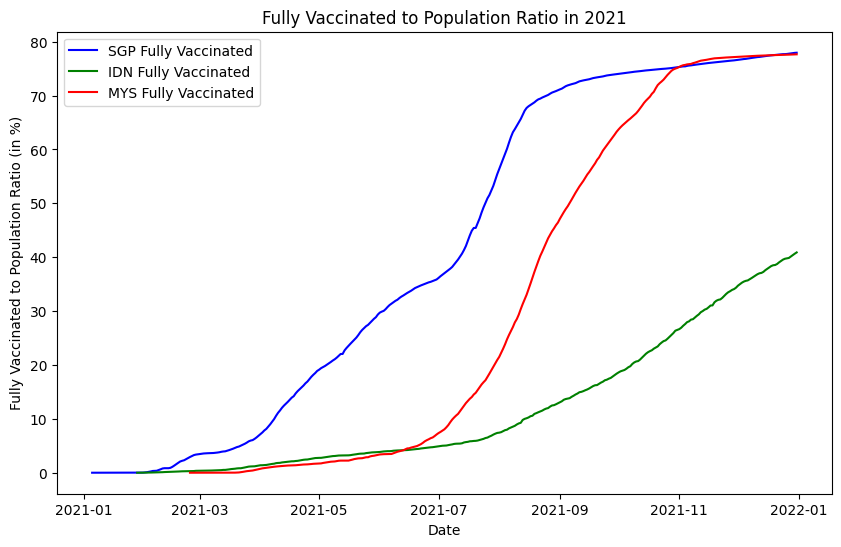

In [45]:
# Plot the ratio of fully vaccinated to population for all countries
plt.figure(figsize=(10, 6))

# Plot data for Singapore in blue
plt.plot(sgp_df_2021['date'], sgp_df_2021['Fully_Vaccinated_to_Population'], label='SGP Fully Vaccinated', color='blue')

# Plot data for Indonesia in green
plt.plot(idn_df_2021['date'], idn_df_2021['Fully_Vaccinated_to_Population'], label='IDN Fully Vaccinated', color='green')

# Plot data for Malaysia in red
plt.plot(mys_df_2021['date'], mys_df_2021['Fully_Vaccinated_to_Population'], label='MYS Fully Vaccinated', color='red')

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated to Population Ratio (in %)')
plt.title('Fully Vaccinated to Population Ratio in 2021')

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

Although mostly similar to the trend of `ratio`, there are some differences in the shape, particularly of **Singapore** and **Malaysia**. Looking at **Singapore's** line graph, there is a convex curve between `2021-05` and `2021-07`, implying that there may be some differences when using the **vaccinated** and **fully vaccinated rates** as variables for analysis. Furthermore, there are also certain periods between `2021-11` and `2022-01` where **Malaysia** surpasses **Singapore** in their **ratio of fully vaccinated to population**.

With such observations, it is clear that it might be of interest to analyze the ratios of both **vaccinated** and **fully vaccinated** when compared to the **daily deaths due to COVID-19**. Such investigations can be done with the help of data modelling.

### What is the correlation between vaccination rates and deaths due to COVID-19 in 2021?

Based on the visualization of the trends of **vaccination** and **full vaccinations** with **new deaths**, it is possible that the two variables associated with **vaccination rates** have a relation with **new deaths**.

With this in mind, the relation between `ratio` and `Deaths_to_Population` for each country can be identified by computing for the **correlation**, which can be computed using the `corr` function.

In [46]:
# Correlation between vaccination rate to ratio of new deaths to population in Indonesia (2021)
ratio_deathtopop_idn = idn_df_2021[['ratio', 'Deaths_to_Population']]
ratio_deathtopop_idn.corr()

,ratio,Deaths_to_Population
ratio,1.000000,-0.213342
Deaths_to_Population,-0.213342,1.000000


In [47]:
# Correlation between vaccination rate to ratio of new deaths to population in Malaysia (2021)
ratio_deathtopop_mys = mys_df_2021[['ratio', 'Deaths_to_Population']]
ratio_deathtopop_mys.corr()

,ratio,Deaths_to_Population
ratio,1.000000,0.389743
Deaths_to_Population,0.389743,1.000000


In [48]:
# Correlation between vaccination rate to ratio of new deaths to population in Singapore (2021)
ratio_deathtopop_sgp = sgp_df_2021[['ratio', 'Deaths_to_Population']]
ratio_deathtopop_sgp.corr()

,ratio,Deaths_to_Population
ratio,1.000000,0.507243
Deaths_to_Population,0.507243,1.000000


To better analyze these results, the `scatter` function can be used to create a **scatter plot** graph, which visualizes the relation between the variables.

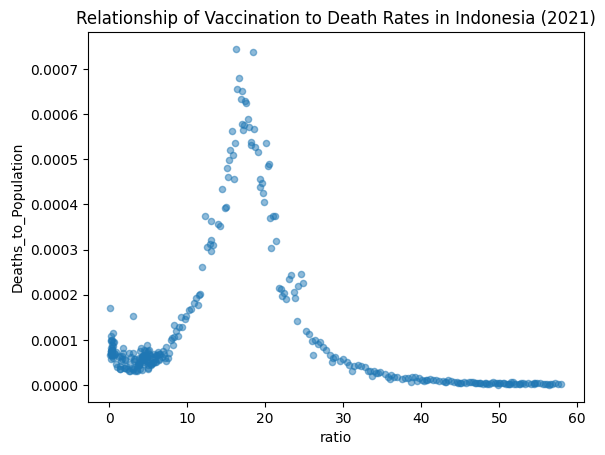

In [49]:
ratio_deathtopop_idn.plot.scatter(x='ratio', y='Deaths_to_Population', alpha=0.5)
plt.title('Relationship of Vaccination to Death Rates in Indonesia (2021)')
plt.show()

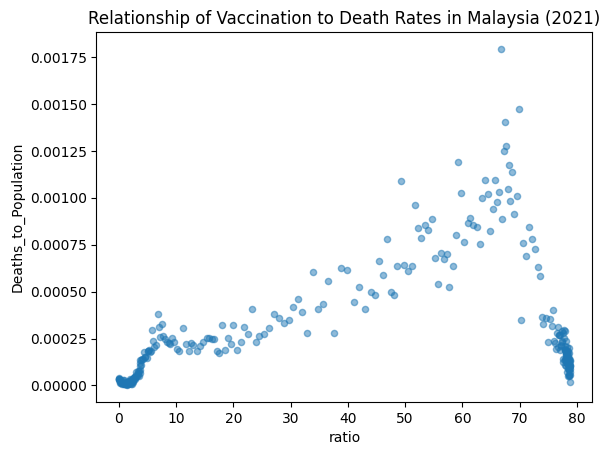

In [50]:
ratio_deathtopop_mys.plot.scatter(x='ratio', y='Deaths_to_Population', alpha=0.5)
plt.title('Relationship of Vaccination to Death Rates in Malaysia (2021)')
plt.show()

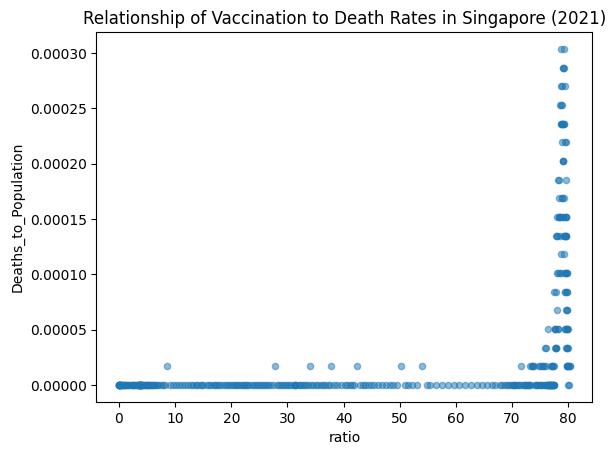

In [51]:
ratio_deathtopop_sgp.plot.scatter(x='ratio', y='Deaths_to_Population', alpha=0.5)
plt.title('Relationship of Vaccination to Death Rates in Singapore (2021)')
plt.show()

Looking at the results, it is clear that there is a certain threshold where the vaccination rate goes from a positive to a negative correlation with the death rate. For **Indonesia**, the correlation is **-0.21**, which should mean there is a **weak negative correlation** between the two variables. On the other hand, the scatter plot implies that it is not always the case, as a positive correlation can be graphed at around 10-20% vaccination rate, despite the negative correlation in the higher ratios.

Meanwhile, **Malaysia** has a correlation of **0.39**, which means there is a **weak positive correlation** between the two variables. The scatter plot also supports the trend until it reached around 70% vaccinated, implying that it may be the threshold where the relationship would become negative.

For **Singapore**, the correlation is **0.51**, implying a moderate **positive correlation** between the two variables. Despite this data, the scatter plot only supports the relationship at around 75% vaccinated, with the trend going down as it reaches 80%.

With such observations, it is clear that the vaccination rate has varying relationships at certain thresholds, with its relationship being positive at the beginning and switching to a negative trend after reaching a certain threshold. Despite this, it does not mean that an increasingly vaccinated population causes additional deaths due to COVID-19, as it is possible that these deaths were merely caused by other factors such as the measures used to combat new infections, as well as a general trend of new cases. On the other hand, it is also possible that it is the other way around, wherein it is the high death rates that influence people to get vaccinated, with the negative trend likely occuring once most people already got vaccinated.

### What is the correlation between fully vaccinated rates and deaths due to COVID-19 in 2021?

Considering the relationship between `ratio` and `Deaths_to_Population`, it is possible that the other variables have a factor in why there is a positive correlation between the two until a certain threshold, which also varies per country. As such, it might be a good idea to consider the relationship between `Fully_Vaccinated_to_Population` and `Deaths_to_Population`, which can be computed and visualized using the same methods.

In [52]:
# Correlation between full vaccination rate to ratio of new deaths to population in Indonesia (2021)
ratio_deathtopop_idn = idn_df_2021[['Fully_Vaccinated_to_Population', 'Deaths_to_Population']]
ratio_deathtopop_idn.corr()

,Fully_Vaccinated_to_Population,Deaths_to_Population
Fully_Vaccinated_to_Population,1.000000,-0.291724
Deaths_to_Population,-0.291724,1.000000


In [53]:
# Correlation between full vaccination rate to ratio of new deaths to population in Malaysia (2021)
ratio_deathtopop_mys = mys_df_2021[['Fully_Vaccinated_to_Population', 'Deaths_to_Population']]
ratio_deathtopop_mys.corr()

,Fully_Vaccinated_to_Population,Deaths_to_Population
Fully_Vaccinated_to_Population,1.000000,0.243903
Deaths_to_Population,0.243903,1.000000


In [54]:
# Correlation between full vaccination rate to ratio of new deaths to population in Singapore (2021)
ratio_deathtopop_sgp = sgp_df_2021[['Fully_Vaccinated_to_Population', 'Deaths_to_Population']]
ratio_deathtopop_sgp.corr()

,Fully_Vaccinated_to_Population,Deaths_to_Population
Fully_Vaccinated_to_Population,1.000000,0.576939
Deaths_to_Population,0.576939,1.000000


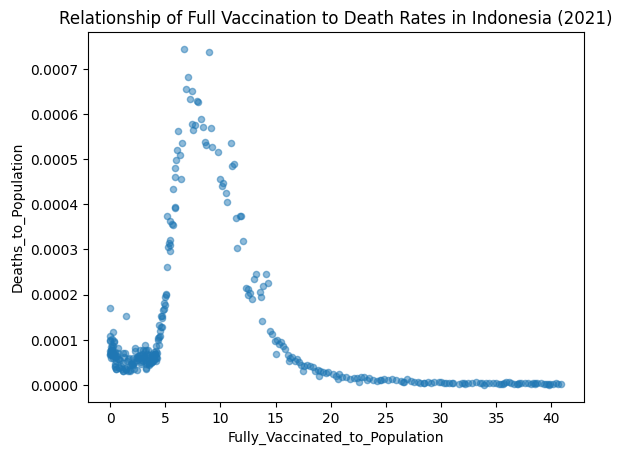

In [55]:
ratio_deathtopop_idn.plot.scatter(x='Fully_Vaccinated_to_Population', y='Deaths_to_Population', alpha=0.5)
plt.title('Relationship of Full Vaccination to Death Rates in Indonesia (2021)')
plt.show()

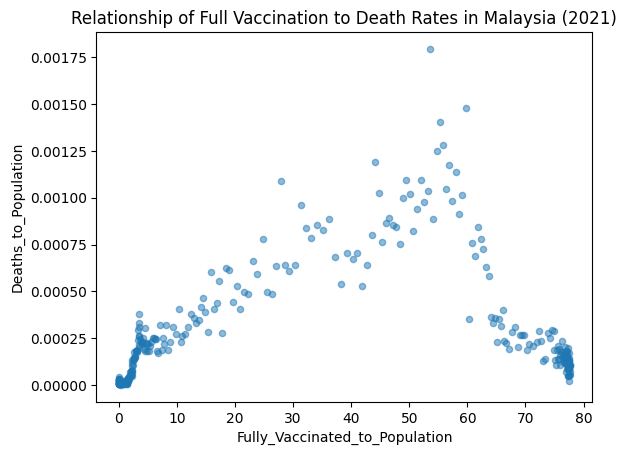

In [56]:
ratio_deathtopop_mys.plot.scatter(x='Fully_Vaccinated_to_Population', y='Deaths_to_Population', alpha=0.5)
plt.title('Relationship of Full Vaccination to Death Rates in Malaysia (2021)')
plt.show()

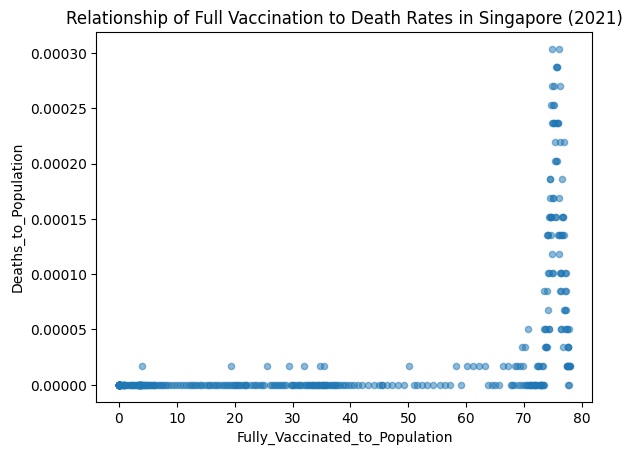

In [57]:
ratio_deathtopop_sgp.plot.scatter(x='Fully_Vaccinated_to_Population', y='Deaths_to_Population', alpha=0.5)
plt.title('Relationship of Full Vaccination to Death Rates in Singapore (2021)')
plt.show()

For **Indonesia**, the correlation is **-0.29**, which means a **weak negative correlation** between `Fully_Vaccinated_to_Population` and `Deaths_to_Population`. This is a similar relationship to `ratio` and `Deaths_to_Population`, with the scatter plot clearly showing a positive correlation at the start until a certain threshold. In this case, the correlation between `Fully_Vaccinated_to_Population` and `Deaths_to_Population` becomes negative at around 7.5% fully vaccinated.

Meanwhile, **Malaysia** has a correlation of **0.24** between `Fully_Vaccinated_to_Population` and `Deaths_to_Population`, implying a **weak positive correlation**. This is also similar to the one for `ratio` and `Deaths_to_Population`. **Singapore** also shares similar observations, with its correlation between `Fully_Vaccinated_to_Population` and `Deaths_to_Population` being **0.58**, a **moderate positive correlation** whose value is only slightly higher than the one between `ratio` and `Deaths_to_Population`.  **Malaysia** and **Singapore** also share similar trends in the scatter plot, wherein Malaysia and Singapore would have a **positive correlation** at a certain rate and peak, with its correlation becoming **negative** afterwards.

Observing the results, it is clear that the relationship of `Fully_Vaccinated_to_Population` and `Deaths_to_Population` is similar to that of `ratio` and `Deaths_to_Population`, although the graphs also show that the thresholds in which correlation changes are slightly different.

## Research Question

To conclude the exploratory data analysis, it is clear that **new deaths due to COVID-19** and **vaccination rates** have a relationship with each other, with the correlation being positive until it peaks at a certain rate and becomes negative. Additionally, it is better to limit the scope of further analysis on the data on records from **2021**, especially as it uses **population** data from **2021** and contains missing data for **Indonesia** between **2022-01** and **2022-03**.

Considering these results, the following reseach question could be formulated and answered using the given initial dataset:

### **How much does the COVID-19 death rate affect the COVID-19 vaccination rate in Southeast Asian countries?**

Although the COVID-19 has slowed down in terms of infections and deaths, it remains important to analyze the effect of the **new deaths** on the **vaccination rate** caused by COVID-19, especially as **vaccination** is a vital phase in combatting diseases. While it is possible that another COVID-19-like scenario may not happen anytime soon, knowing the significance of **death rates** and how they affect **vaccination rates** can provide a clearer idea on how to combat future pandemics, no matter how unlikely it may be. Furthermore, considering the scope, it would also help Southeast Asian countries identify what strategies they may need when initiating vaccination programs in similar scenarios.

## Data Modeling

After conducting exploratory data analysis (EDA) and identifying the research question, the next step is to delve into data modelling. As the EDA allowed the group to gain insights into the dataset, the aim now is to construct and assess the data models to answer the research question.

### Data Preprocessing

Before applying data modelling techniques, the data has to be preprocessed to ensure its quality and readiness for analysis. The preprocessing typically includes methods such as handling missing data, outlier detection, and binning, which will all be used in this case study.

**Handling Missing Data**

Missing values in the dataset have to be identified and addressed because they can adversely affect the validity and reliability of our analysis and models. These missing data can introduce bias, distort relationships between variables, and result in inaccurate or incomplete insights. Thus, in order to enhance the quality and interpretability of the subsequent analysis and modelling efforts., we want to identify and address the missing values through methods like imputation.

To assess the data quality and identify any missing values, we start by printing the sum of null values in the datasets for Singapore, Indonesia, and Malaysia. This initial step aims to provide insights into whether there are any missing values in the variables for each observation that may require further attention during the data preprocessing phase.

To quickly check for missing values in a dataset, use the pandas `dataframe.isnull().sum().sum()` function. This function returns the total count of missing values across the entire dataset, helping to identify if any missing values exist without detailing their specific locations.

In [58]:
# Print the total number of null values for each country's dataframe
print("Singapore: ", sgp_df_2021.isnull().sum().sum())
print("Indonesia: ", idn_df_2021.isnull().sum().sum())
print("Malaysia: ", mys_df_2021.isnull().sum().sum())

Singapore:  0
Indonesia:  0
Malaysia:  0


Since the function **returns 0** for the datasets of Singapore, Indonesia, and Malaysia, there is no need to address any missing values in these datasets.

**Outlier Detection**

Identifying and addressing outliers is crucial for ensuring the integrity and accuracy of data modelling techniques. Outliers can distort statistical measures, introduce bias, and compromise the reliability of model outcomes. Employing a quantitative approach, such as calculating z-scores using the `zscore` function from the `scipy.stats` module, provides a standardized method to assess the deviation of each data point from the mean.

In [59]:
from scipy.stats import zscore
threshold = 3

In this specific implementation for Singapore, Indonesia, and Malaysia's dataframes, the 'threshold' is set to 3, designating data points beyond 3 standard deviations from the mean as outliers. This is because in a normal distribution, 99.7% of the data should be within 3 standard deviations, meaning any record beyond that should be considered as an outlier.

The resulting boolean arrays (`outliers_ratio`, `outliers_fullvacc`, and `outliers_mortality`) flag outliers in the specified columns, and additional columns (`outlier_ratio`, `outlier_fullvacc` and `outlier_mortality`) are appended to the dataframes to denote the presence of outliers. By utilizing the z-score method, this approach systematically identifies and marks outliers, ensuring that subsequent data modelling is conducted on a more reliable and representative dataset. The code concludes by excluding the rows containing outliers from the analysis, as these instances could be extreme cases that do not occur normally. This robust methodology supports the development of accurate models by mitigating the impact of outliers on statistical analyses.

*Removing outliers for Singapore:*

This code calculates z-scores for `ratio`, `Fully_Vaccinated_to_Population` and `Deaths_to_Population` in the Singapore DataFrame (`sgp_df_2021`), identifies outliers based on a specified threshold, adds new columns to mark outliers, and counts the occurrences of outliers for both columns.

In [60]:
# Calculate z-scores for ratio, fully vaccinated to population, and deaths to population
z_scores_ratio = zscore(sgp_df_2021['ratio'])
z_scores_fullvacc = zscore(sgp_df_2021['Fully_Vaccinated_to_Population'])
z_scores_mortality = zscore(sgp_df_2021['Deaths_to_Population'])

# Identifying outliers
outliers_ratio = (abs(z_scores_ratio) > threshold)
outliers_fullvacc = (abs(z_scores_fullvacc) > threshold)
outliers_mortality = (abs(z_scores_mortality) > threshold)

# Create a new column to mark outliers
sgp_df_2021['outlier_ratio'] = outliers_ratio
sgp_df_2021['outlier_fullvacc'] = outliers_fullvacc
sgp_df_2021['outlier_mortality'] = outliers_mortality

# Count the number of outliers
print((sgp_df_2021['outlier_ratio'] == True).value_counts())
print((sgp_df_2021['outlier_fullvacc'] == True).value_counts())
print((sgp_df_2021['outlier_mortality'] == True).value_counts())

False    361
Name: outlier_ratio, dtype: int64
False    361
Name: outlier_fullvacc, dtype: int64
False    350
True      11
Name: outlier_mortality, dtype: int64


Outliers in the `ratio`, `Fully_Vaccinated_to_Population`, and `Deaths_to_Population` columns are removed from the `sgp_df_2021` DataFrame, creating a refined DataFrame named `sgp_df_2021_processed`. Verification is performed by printing outlier counts for each column, confirming the successful exclusion of extreme cases.

The **`sgp_df_2021_processed`** DataFrame is now ready for further analysis.

In [61]:
# Drop rows with outliers
sgp_df_2021_processed = sgp_df_2021.drop(sgp_df_2021[sgp_df_2021['outlier_ratio'] == True].index)
sgp_df_2021_processed = sgp_df_2021.drop(sgp_df_2021[sgp_df_2021['outlier_fullvacc'] == True].index)
sgp_df_2021_processed = sgp_df_2021.drop(sgp_df_2021[sgp_df_2021['outlier_mortality'] == True].index)

# Verify the DataFrame after dropping outliers
print((sgp_df_2021_processed['outlier_ratio'] == True).value_counts())
print((sgp_df_2021_processed['outlier_fullvacc'] == True).value_counts())
print((sgp_df_2021_processed['outlier_mortality'] == True).value_counts())


False    350
Name: outlier_ratio, dtype: int64
False    350
Name: outlier_fullvacc, dtype: int64
False    350
Name: outlier_mortality, dtype: int64


*Removing outliers for Indonesia:*

Applying similar procedures as previously described, outliers are eliminated from Indonesia's DataFrame.

In [62]:
# Calculate z-scores for ratio, fully vaccinated to population, and deaths to population
z_scores_ratio = zscore(idn_df_2021['ratio'])
z_scores_fullvacc = zscore(idn_df_2021['Fully_Vaccinated_to_Population'])
z_scores_mortality = zscore(idn_df_2021['Deaths_to_Population'])

# Identifying outliers
outliers_ratio = (abs(z_scores_ratio) > threshold)
outliers_fullvacc = (abs(z_scores_fullvacc) > threshold)
outliers_mortality = (abs(z_scores_mortality) > threshold)

# Create a new column to mark outliers
idn_df_2021['outlier_ratio'] = outliers_ratio
idn_df_2021['outlier_fullvacc'] = outliers_fullvacc
idn_df_2021['outlier_mortality'] = outliers_mortality

# Count the number of outliers
print((idn_df_2021['outlier_ratio'] == True).value_counts())
print((idn_df_2021['outlier_fullvacc'] == True).value_counts())
print((idn_df_2021['outlier_mortality'] == True).value_counts())

False    329
Name: outlier_ratio, dtype: int64
False    329
Name: outlier_fullvacc, dtype: int64
False    322
True       7
Name: outlier_mortality, dtype: int64


In [63]:
# Drop rows with outliers for Indonesia
idn_df_2021_processed = idn_df_2021.drop(idn_df_2021[idn_df_2021['outlier_ratio'] == True].index)
idn_df_2021_processed = idn_df_2021.drop(idn_df_2021[idn_df_2021['outlier_fullvacc'] == True].index)
idn_df_2021_processed = idn_df_2021.drop(idn_df_2021[idn_df_2021['outlier_mortality'] == True].index)

# Verify the DataFrame after dropping outliers
print((idn_df_2021_processed['outlier_ratio'] == True).value_counts())
print((idn_df_2021_processed['outlier_fullvacc'] == True).value_counts())
print((idn_df_2021_processed['outlier_mortality'] == True).value_counts())

False    322
Name: outlier_ratio, dtype: int64
False    322
Name: outlier_fullvacc, dtype: int64
False    322
Name: outlier_mortality, dtype: int64


*Removing outliers for Malaysia:*

Applying similar procedures as previously described, outliers are eliminated from Malaysia's DataFrame.

In [64]:
# Calculate z-scores for ratio, fully vaccinated to population, and deaths to population
z_scores_ratio = zscore(mys_df_2021['ratio'])
z_scores_fullvacc = zscore(mys_df_2021['Fully_Vaccinated_to_Population'])
z_scores_mortality = zscore(mys_df_2021['Deaths_to_Population'])

# Identifying outliers
outliers_ratio = (abs(z_scores_ratio) > threshold)
outliers_fullvacc = (abs(z_scores_fullvacc) > threshold)
outliers_mortality = (abs(z_scores_mortality) > threshold)

# Create a new column to mark outliers
mys_df_2021['outlier_ratio'] = outliers_ratio
mys_df_2021['outlier_fullvacc'] = outliers_fullvacc
mys_df_2021['outlier_mortality'] = outliers_mortality

# Count the number of outliers
print((mys_df_2021['outlier_ratio'] == True).value_counts())
print((mys_df_2021['outlier_fullvacc'] == True).value_counts())
print((mys_df_2021['outlier_mortality'] == True).value_counts())

False    311
Name: outlier_ratio, dtype: int64
False    311
Name: outlier_fullvacc, dtype: int64
False    307
True       4
Name: outlier_mortality, dtype: int64


In [65]:
# Drop rows with outliers for Malaysia
mys_df_2021_processed = mys_df_2021.drop(mys_df_2021[mys_df_2021['outlier_ratio'] == True].index)
mys_df_2021_processed = mys_df_2021.drop(mys_df_2021[mys_df_2021['outlier_fullvacc'] == True].index)
mys_df_2021_processed = mys_df_2021.drop(mys_df_2021[mys_df_2021['outlier_mortality'] == True].index)

# Verify the DataFrame after dropping outliers
print((mys_df_2021_processed['outlier_ratio'] == True).value_counts())
print((mys_df_2021_processed['outlier_fullvacc'] == True).value_counts())
print((mys_df_2021_processed['outlier_mortality'] == True).value_counts())

False    307
Name: outlier_ratio, dtype: int64
False    307
Name: outlier_fullvacc, dtype: int64
False    307
Name: outlier_mortality, dtype: int64


With the absence of `True` values in the **`outlier_ratio`**, **`outlier_fullvacc`** and **`outlier_mortality`** columns for all three dataframes, it can be affirmed that the removal process effectively eliminated all outliers from the datasets.

**Binning**

Binning is useful for converting continuous numerical variables into discrete intervals or bins, which is advantageous when preparing numerical data for association rule mining. This process simplifies the complexity of the data, making it more amenable to traditional association rule algorithms. By assigning numerical values to specific bins, relationships between different levels of the variables can be captured, aiding the discovery of associations and patterns.

In the process of data discretization to determine the number of bins, a commonly employed heuristic involves using the square root of the total number of data points as an initial guideline. This approach strikes a balance, offering a moderate level of granularity to represent variations without introducing unnecessary complexity. It aims for precision and interpretability, providing a practical compromise when the optimal bin size is not precisely known.

*Binning of Singapore's dataset*

Calculate the bin number for Singapore's variables by applying the `np.sqrt` function to the total number of observations.

In [66]:
# Calculate the square root of the number of data points
sgp_bins = int(np.sqrt(len(sgp_df_2021_processed)))
print(sgp_bins)

18


The implementation involves using the function `pd.cut`, where the numerical data is partitioned into pre-determined intervals, enabling the generation of association rules based on the discretized data. This makes the data more suited for association rule mining algorithms by facilitating the extraction of insightful patterns and insights.

Discretize the `ratio` variable for Singapore based on the calculated number of bins.

In [67]:
# Use pd.cut to discretize the data into bins
sgp_discretized_r = pd.cut(sgp_df_2021_processed['ratio'], bins=sgp_bins, labels=False)
sgp_discretized_r

26290     0
26291     0
26292     0
26293     0
26294     0
         ..
26646    17
26647    17
26648    17
26649    17
26650    17
Name: ratio, Length: 350, dtype: int64

The `ratio` column in the dataframe `sgp_df_2021_processed` undergoes a binning process based on previously discretized values stored in the `sgp_discretized_r` variable. The resultant binned values are transformed into a categorical data type using `astype('category')`. The subsequent application of the `value_counts()` function to the `ratio_Binned` column then generates a count distribution for each unique bin, offering a concise summary of the distribution of binned values and their respective frequencies within the dataset.

In [68]:
sgp_df_2021_processed['ratio_Binned'] = sgp_discretized_r
sgp_df_2021_processed['ratio_Binned'] = sgp_df_2021_processed['ratio_Binned'].astype('category')

print(sgp_df_2021_processed['ratio_Binned'].value_counts())

17    120
0      51
16     30
1      18
7      14
4      13
15     13
3      12
5      12
6      12
9      10
2       9
8       9
10      7
11      6
12      5
14      5
13      4
Name: ratio_Binned, dtype: int64


Discretize the `Fully_Vaccinated_to_Population` variable for Singapore based on the calculated number of bins.

In [69]:
# Use pd.cut to discretize the data into bins
sgp_discretized_fvp = pd.cut(sgp_df_2021_processed['Fully_Vaccinated_to_Population'], bins=sgp_bins, labels=False)
sgp_discretized_fvp

26290     0
26291     0
26292     0
26293     0
26294     0
         ..
26646    17
26647    17
26648    17
26649    17
26650    17
Name: Fully_Vaccinated_to_Population, Length: 350, dtype: int64

The `Fully_Vaccinated_to_Population` column will also go through a similar process. Consequently, the `value_counts()` function is applied to the 'Fully_Vaccinated_to_Population_Binned' column, producing a count distribution for each unique bin.

In [70]:
sgp_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = sgp_discretized_fvp
sgp_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = sgp_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].astype('category')

print(sgp_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].value_counts())

17    88
0     72
16    34
1     19
7     18
8     18
4     15
6     13
3     11
5     11
15    10
2      9
9      7
10     6
11     5
13     5
14     5
12     4
Name: Fully_Vaccinated_to_Population_Binned, dtype: int64


Discretize the `Deaths_to_Population` variable for Singapore based on the calculated number of bins.

In [71]:
# Use pd.cut to discretize the data into bins
sgp_discretized_dtp = pd.cut(sgp_df_2021_processed['Deaths_to_Population'], bins=sgp_bins, labels=False)
sgp_discretized_dtp

26290    0
26291    0
26292    0
26293    0
26294    0
        ..
26646    1
26647    3
26648    0
26649    1
26650    1
Name: Deaths_to_Population, Length: 350, dtype: int64

Apply the same steps for `Deaths_to_Population` column in the DataFrame `sgp_df_2021_processed`, leading to a new `Deaths_to_Population_Binned` to store those values.

In [72]:
sgp_df_2021_processed['Deaths_to_Population_Binned'] = sgp_discretized_dtp
sgp_df_2021_processed['Deaths_to_Population_Binned'] = sgp_df_2021_processed['Deaths_to_Population_Binned'].astype('category')

print(sgp_df_2021_processed['Deaths_to_Population_Binned'].value_counts())

0     235
1      32
3      12
2      10
10     10
11     10
7       9
17      7
6       6
5       4
12      4
14      3
15      3
16      3
8       2
Name: Deaths_to_Population_Binned, dtype: int64


*Binning of Indonesia's dataset*

Apply the same binning method used for Singapore to discretize the `'ratio'` and `'Deaths_to_Population'` variables for Indonesia.

Calculate the bin number for Indonesia's variables by applying the `np.sqrt` function to the total number of observations.

In [73]:
# Calculate the square root of the number of data points
idn_bins = int(np.sqrt(len(idn_df_2021_processed)))
print(idn_bins)

17


Discretize the `ratio` variable for Indonesia based on the calculated number of bins.

In [74]:
# Use pd.cut to discretize the data into bins
idn_discretized_r = pd.cut(idn_df_2021_processed['ratio'], bins=idn_bins, labels=False)
idn_discretized_r

13372     0
13373     0
13374     0
13375     0
13376     0
         ..
13696    16
13697    16
13698    16
13699    16
13700    16
Name: ratio, Length: 322, dtype: int64

The code applies binning to the `ratio` column in the DataFrame for Indonesia (`idn_df_2021_processed`), converts the binned values into a categorical data type, and then prints the count distribution of each unique bin using `value_counts()`.

In [75]:
idn_df_2021_processed['ratio_Binned'] = idn_discretized_r
idn_df_2021_processed['ratio_Binned'] = idn_df_2021_processed['ratio_Binned'].astype('category')

print(idn_df_2021_processed['ratio_Binned'].value_counts())

0     63
1     62
2     19
5     18
14    16
15    15
13    14
3     14
4     14
6     14
16    12
11    11
7     11
12    10
10    10
8     10
9      9
Name: ratio_Binned, dtype: int64


Discretize the `Fully_Vaccinated_to_Population` variable for Indonesia based on the calculated number of bins.

In [76]:
# Use pd.cut to discretize the data into bins
idn_discretized_fvp = pd.cut(idn_df_2021_processed['Fully_Vaccinated_to_Population'], bins=idn_bins, labels=False)
idn_discretized_fvp

13372     0
13373     0
13374     0
13375     0
13376     0
         ..
13696    16
13697    16
13698    16
13699    16
13700    16
Name: Fully_Vaccinated_to_Population, Length: 322, dtype: int64

Afterwards, follow the same steps and create `Fully_Vaccinated_to_Population_Binned` to represent the discretized values.

In [77]:
idn_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = idn_discretized_fvp
idn_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = idn_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].astype('category')

print(idn_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].value_counts())

0     77
1     67
2     27
6     14
4     14
16    13
5     13
7     12
14    11
15    11
3     10
11    10
9      9
12     9
8      9
10     8
13     8
Name: Fully_Vaccinated_to_Population_Binned, dtype: int64


Discretize the `Deaths_to_Population` variable for Indonesia based on the calculated number of bins.

In [78]:
# Use pd.cut to discretize the data into bins
idn_discretized_dtp = pd.cut(idn_df_2021_processed['Deaths_to_Population'], bins=idn_bins, labels=False)
idn_discretized_dtp

13372    4
13373    1
13374    2
13375    2
13376    2
        ..
13696    0
13697    0
13698    0
13699    0
13700    0
Name: Deaths_to_Population, Length: 322, dtype: int64

The same code applies binning to the `Deaths_to_Population` column in the DataFrame for Indonesia (`idn_df_2021_processed`), converts the binned values into a categorical data type, and then prints the count distribution of each unique bin using `value_counts()`.

In [79]:
idn_df_2021_processed['Deaths_to_Population_Binned'] = idn_discretized_dtp
idn_df_2021_processed['Deaths_to_Population_Binned'] = idn_df_2021_processed['Deaths_to_Population_Binned'].astype('category')

print(idn_df_2021_processed['Deaths_to_Population_Binned'].value_counts())

0     107
1     102
2      36
5      11
3       9
4       8
15      7
8       7
10      6
13      6
14      6
11      4
12      4
6       4
9       3
7       1
16      1
Name: Deaths_to_Population_Binned, dtype: int64


*Binning of Malaysia's dataset*

Apply the same binning method used for Singapore to discretize the `'ratio'` and `'Deaths_to_Population'` variables for Malaysia.

Calculate the bin number for Malaysia's variables by applying the `np.sqrt` function to the total number of observations.

In [80]:
# Calculate the square root of the number of data points
mys_bins = int(np.sqrt(len(mys_df_2021_processed)))
print(mys_bins)

17


Discretize the `ratio` variable for Malaysia based on the calculated number of bins.


In [81]:
# Use pd.cut to discretize the data into bins
mys_discretized_r = pd.cut(mys_df_2021_processed['ratio'], bins=mys_bins, labels=False)
mys_discretized_r

18817     0
18818     0
18819     0
18820     0
18821     0
         ..
19123    16
19124    16
19125    16
19126    16
19127    16
Name: ratio, Length: 307, dtype: int64

The code applies binning to the `ratio` column in the DataFrame for Malaysia (`mys_df_2021_processed`), converts the binned values into a categorical data type, and then prints the count distribution of each unique bin using `value_counts()`.

In [82]:
mys_df_2021_processed['ratio_Binned'] = mys_discretized_r
mys_df_2021_processed['ratio_Binned'] = mys_df_2021_processed['ratio_Binned'].astype('category')

print(mys_df_2021_processed['ratio_Binned'].value_counts())

16    90
0     89
1     19
14    12
2     10
13    10
3      9
12     9
15     9
4      8
11     8
10     7
5      6
6      6
9      6
7      5
8      4
Name: ratio_Binned, dtype: int64


Discretize the `Fully_Vaccinated_to_Population` variable for Malaysia based on the calculated number of bins.

In [83]:
# Use pd.cut to discretize the data into bins
mys_discretized_fvp = pd.cut(mys_df_2021_processed['Fully_Vaccinated_to_Population'], bins=mys_bins, labels=False)
mys_discretized_fvp

18817     0
18818     0
18819     0
18820     0
18821     0
         ..
19123    16
19124    16
19125    16
19126    16
19127    16
Name: Fully_Vaccinated_to_Population, Length: 307, dtype: int64

Afterwards, apply it as a new column like in the previous examples.

In [84]:
mys_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = mys_discretized_fvp
mys_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = mys_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].astype('category')

print(mys_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].value_counts())

0     113
16     68
1      20
14     12
15     11
2      10
3      10
10      8
13      8
4       7
11      7
5       6
9       6
12      6
6       5
7       5
8       5
Name: Fully_Vaccinated_to_Population_Binned, dtype: int64


Discretize the `Deaths_to_Population` variable for Malaysia based on the calculated number of bins.

In [85]:
# Use pd.cut to discretize the data into bins
mys_discretized_dtp = pd.cut(mys_df_2021_processed['Deaths_to_Population'], bins=mys_bins, labels=False)
mys_discretized_dtp

18817    0
18818    0
18819    0
18820    0
18821    0
        ..
19123    0
19124    1
19125    0
19126    1
19127    1
Name: Deaths_to_Population, Length: 307, dtype: int64

Similarly, the code applies binning to the `Deaths_to_Population` column for Malaysia, converts the binned values into a categorical data type, and prints the count distribution of each unique bin using `value_counts()`.

In [86]:
mys_df_2021_processed['Deaths_to_Population_Binned'] = mys_discretized_dtp
mys_df_2021_processed['Deaths_to_Population_Binned'] = mys_df_2021_processed['Deaths_to_Population_Binned'].astype('category')

print(mys_df_2021_processed['Deaths_to_Population_Binned'].value_counts())

0     85
1     50
2     44
3     36
4     19
8     11
5      9
11     8
10     7
13     7
6      6
9      6
7      5
12     5
14     5
15     2
16     2
Name: Deaths_to_Population_Binned, dtype: int64


After discretizing the datasets for Singapore, Indonesia, and Malaysia using a common binning method, the variables `ratio`, `Fully_Vaccinated_to_Population` and `Deaths_to_Population` have been transformed into categorical representations. This process allows for a simplified yet informative view of the data, making it conducive for further analysis. The chosen binning approach aims to balance granularity and interpretability, providing a practical basis for exploring patterns and relationships within each country's dataset. The discretized data sets lay the foundation for subsequent analyses, such as association rule mining, that can reveal insights into the relationships between vaccination rates and death rates due to COVID-19 in Southeast Asian countries.

### Data Modeling: Association Rule Mining

In the exploration of a research question seeking to unveil a causal relationship between vaccination rates and death rates due to COVID-19 in Southeast Asian countries, the most fitting data modelling technique among the options of Clustering and Recommender Systems is identified as Association Rule Mining. The research question is framed to comprehend the causal dynamics within the dataset, and Association Rule Mining is effective in exposing associations and dependencies between variables, aligning well with the objective of identifying potential causal relationships.

While Association Rule Mining does not inherently establish causation, the patterns and rules it reveals provide valuable insights, steering subsequent investigations or experimental studies aimed at establishing causal connections. In contrast, Clustering concentrates on grouping similar data points, and Recommender Systems, though indirectly capturing some causal relationships, are primarily designed for personalized recommendations rather than explicit causal inference. Therefore, for the specific task of exploring causal relationships within the given research question, Association Rule Mining stands out as the most appropriate choice.

Import `RuleMiner` class

In [87]:
from rule_miner import RuleMiner

ModuleNotFoundError: ignored


Instantiate a RuleMiner object by setting support threshold to **0.1** and confidence threshold to **0.8**. A support threshold of **0.1** is chosen to identify relatively frequent itemsets, ensuring they occur in at least **10% of transactions**. The confidence threshold of **0.8** emphasizes the extraction of rules with a high level of certainty, retaining only those with at least 80% confidence. These thresholds strike a balance between capturing meaningful patterns in the dataset and ensuring the reliability of the discovered association rules. Adjustments may be made based on specific dataset characteristics and analysis objectives.

In [ ]:
rule_miner = RuleMiner(0.1, 0.8)


***Association Rule Mining on Singapore's dataset***

The categorical columns `ratio_Binned`, `Fully_Vaccinated_to_Population` and `Deaths_to_Population_Binned` in `sgp_df_2021_processed` are converted to numeric labels using the `cat.codes` method. This transformation assigns a unique numeric code to each distinct category in these columns, ensuring a standardized and computationally efficient representation.

Subsequently, the DataFrame is grouped by the binned ratio (`ratio_Binned`), binned fully-vaccinated-to-population (`Fully_Vaccinated_to_Population_Binned`), and binned deaths-to-population (`Deaths_to_Population_Binned`), and the `size()` function is applied to count the occurrences of each unique combination, providing a quantitative measure of the frequency of these combinations in the dataset. The `reset_index(name='count')` part is used to reset the index and create a new column named `count` to store the occurrence count for each combination.

The resulting `sgp_transactions` DataFrame represents a tabulation of the frequencies of each unique combination of binned ratio, binned fully-vaccinated-to-population, and binned deaths-to-population in the original dataset, providing a foundation for further analysis such as association rule mining.

In [ ]:
# Convert categorical columns to numeric labels
sgp_df_2021_processed['ratio_Binned'] = sgp_df_2021_processed['ratio_Binned'].cat.codes
sgp_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = sgp_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].cat.codes
sgp_df_2021_processed['Deaths_to_Population_Binned'] = sgp_df_2021_processed['Deaths_to_Population_Binned'].cat.codes

sgp_transactions = sgp_df_2021_processed.groupby(['ratio_Binned', 'Fully_Vaccinated_to_Population_Binned', 'Deaths_to_Population_Binned']).size().reset_index(name='count')
print(sgp_transactions)

The `get_frequent_itemsets` function from the `RuleMiner` class is used to extract frequent itemsets from the `sgp_transactions` DataFrame, where each row represents a unique combination of binned 'ratio', 'Fully_Vaccinated_to_Population', and 'Deaths_to_Population' values. The resulting `sgp_frequent_itemsets` variable contains these frequent itemsets, revealing patterns of co-occurrence along with their associated counts. This step is fundamental for subsequent association rule mining and gaining insights into the relationships between binned variables.

In [ ]:
sgp_frequent_itemsets = rule_miner.get_frequent_itemsets(sgp_transactions)
print(sgp_frequent_itemsets)

The association rules for the frequent itemsets derived from the transaction data of Singapore are generated using the `get_association_rules` method from the `RuleMiner` class. The resulting `sgp_association_rules` variable contains a list of rules indicating significant co-occurrence patterns among binned variables. These rules offer insights into potential relationships and dependencies within the dataset, aiding in the understanding of associations between different features.

In [ ]:
sgp_association_rules = rule_miner.get_association_rules(sgp_transactions)
print(sgp_association_rules)

Based on the results of the association rules, there are four rules that indicate the relationships between the binned variables 'ratio', 'Fully_Vaccinated_to_Population', and 'Deaths_to_Population' for Singapore:
1. **{Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, count} -> {ratio_Binned}:** When specific patterns in binned death rates, fully vaccinated rates, and counts occur together, they are associated with or influence specific patterns in binned vaccination ratios.

2. **{Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, ratio_Binned} -> {count}** When certain combinations of binned death rates, fully vaccinated rates, and binned vaccination ratios occur together, they are associated with or influence the occurrence of specific counts.

3. **{Deaths_to_Population_Binned, count, ratio_Binned} -> {Fully_Vaccinated_to_Population_Binned}:** When specific patterns in binned death rates, counts, and binned vaccination ratios occur together, they are associated with or influence specific patterns in fully vaccinated rates.

4. **{Deaths_to_Population_Binned} -> {Fully_Vaccinated_to_Population_Binned, count, ratio_Binned}:** The occurrence of a particular pattern in binned death rates is linked with or may play a role in predicting patterns in fully vaccinated rates, counts, and binned vaccination ratios.

***Association Rule Mining on Indonesia's dataset***

Similar to the process applied to Singapore's dataset, Indonesia's dataset undergoes the same transformation to discover association rules between `ratio`, `Fully_Vaccinated_to_Population` and `Deaths_to_Population`.

Indonesia's dataset undergoes categorical-to-numeric transformation for `ratio_Binned`, `Fully_Vaccinated_to_Population_Binned` and `Deaths_to_Population_Binned` using `cat.codes`. The DataFrame is grouped by these binned variables, and `size()` is applied to quantify unique combination frequencies. The resulting `idn_transactions` DataFrame provides counts for each combination, facilitating subsequent analyses like association rule mining.

In [ ]:
# Convert categorical columns to numeric labels
idn_df_2021_processed['ratio_Binned'] = idn_df_2021_processed['ratio_Binned'].cat.codes
idn_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = idn_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].cat.codes
idn_df_2021_processed['Deaths_to_Population_Binned'] = idn_df_2021_processed['Deaths_to_Population_Binned'].cat.codes

idn_transactions = idn_df_2021_processed.groupby(['ratio_Binned', 'Fully_Vaccinated_to_Population_Binned', 'Deaths_to_Population_Binned']).size().reset_index(name='count')
print(idn_transactions)

The `get_frequent_itemsets` function identifies frequent itemsets in the `idn_transactions` DataFrame, capturing co-occurrence patterns between binned `ratio`, `Fully_Vaccinated_to_Population` and `Deaths_to_Population` values. The results are stored in the `idn_frequent_itemsets` variable.

In [ ]:
idn_frequent_itemsets = rule_miner.get_frequent_itemsets(idn_transactions)
print(idn_frequent_itemsets)

Association rules are generated for frequent itemsets in Indonesia's transaction data using the `get_association_rules` method from the `RuleMiner` class. The `idn_association_rules` variable holds concise rules, revealing co-occurrence patterns and relationships among binned variables.

In [ ]:
idn_association_rules = rule_miner.get_association_rules(idn_transactions)
print(idn_association_rules)

Based on the results of the association rules, there are four rules that indicate the relationships between the binned variables 'ratio', 'Fully_Vaccinated_to_Population', and 'Deaths_to_Population' for Indonesia, which is as Singapore:
1. **{Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, count} -> {ratio_Binned}**

2. **{Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, ratio_Binned} -> {count}**

3. **{Deaths_to_Population_Binned, count, ratio_Binned} -> {Fully_Vaccinated_to_Population_Binned}**

4. **{Deaths_to_Population_Binned} -> {Fully_Vaccinated_to_Population_Binned, count, ratio_Binned}**

This implies that similar patterns and relationships exist in the datasets of both Singapore and Indonesia regarding the specified binned variables. This could indicate that certain patterns and influences on vaccination rates in response to death rates are consistent between Singapore and Indonesia.

***Association Rule Mining for Malaysia's Dataset***

Following a process similar to that applied to Singapore's dataset, Malaysia's dataset undergoes analogous transformations to unveil association rules between `ratio`, `Fully_Vaccinated_to_Population`, and `Deaths_to_Population`.

Categorical-to-numeric conversion is applied to `ratio_Binned`, `Fully_Vaccinated_to_Population_Binned` and `Deaths_to_Population_Binned` using `cat.codes`. The DataFrame is then grouped by these binned variables, and the `size()` function quantifies the frequencies of unique combinations. The resulting `mys_transactions` DataFrame captures counts for each combination, enabling subsequent analyses such as association rule mining.

In [ ]:
# Convert categorical columns to numeric labels
mys_df_2021_processed['ratio_Binned'] = mys_df_2021_processed['ratio_Binned'].cat.codes
mys_df_2021_processed['Fully_Vaccinated_to_Population_Binned'] = mys_df_2021_processed['Fully_Vaccinated_to_Population_Binned'].cat.codes
mys_df_2021_processed['Deaths_to_Population_Binned'] = mys_df_2021_processed['Deaths_to_Population_Binned'].cat.codes

mys_transactions = mys_df_2021_processed.groupby(['ratio_Binned', 'Fully_Vaccinated_to_Population_Binned', 'Deaths_to_Population_Binned']).size().reset_index(name='count')
print(mys_transactions)


The `get_frequent_itemsets` function identifies frequent itemsets in the `mys_transactions` DataFrame, capturing co-occurrence patterns between binned `ratio` and `Deaths_to_Population` values. The results are stored in the `mys_frequent_itemsets` variable.

In [ ]:
mys_frequent_itemsets = rule_miner.get_frequent_itemsets(mys_transactions)
print(mys_frequent_itemsets)

Association rules are generated for frequent itemsets in Malaysia's transaction data using the `get_association_rules` method from the `RuleMiner` class. The `mys_association_rules` variable holds concise rules, revealing co-occurrence patterns and relationships among binned variables.

In [ ]:
mys_association_rules = rule_miner.get_association_rules(mys_transactions)
print(mys_association_rules)

Based on the results of the association rules, there are eight rules that indicate the relationships between the binned variables 'ratio', 'Fully_Vaccinated_to_Population', and 'Deaths_to_Population' for Malaysia:
1. **{Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, count} -> {ratio_Binned}:**

2. **{Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, ratio_Binned} -> {count}:**

3. **{Deaths_to_Population_Binned, count, ratio_Binned} -> {Fully_Vaccinated_to_Population_Binned}:**

4. **{Deaths_to_Population_Binned} -> {Fully_Vaccinated_to_Population_Binned, count, ratio_Binned}:**

Among the eight rules, four of them are the same association rules observed in the dataset for Singapore and Indonesia. This implies that these given rules are likely a pattern present among more countries in the region, which could imply the possibility of `Deaths_to_Population_Binned` being a factor to their relationship.

5. **{ratio_Binned} -> {Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, count}:** When certain patterns in binned vaccination ratios are observed, they are linked with or affect the occurrence of specific patterns in both binned death rates, fully vaccinated rates, and counts.

6. **{count} -> {Deaths_to_Population_Binned, Fully_Vaccinated_to_Population_Binned, ratio_Binned}:**  The occurrence count is associated with or influenced by specific patterns in binned death rates, fully vaccinated rates, and binned vaccination ratios. This suggests that the frequency of events is connected to certain patterns in these variables.

7. **{Fully_Vaccinated_to_Population_Binned} -> {Deaths_to_Population_Binned, count, ratio_Binned}:** When specific patterns in fully vaccinated rates are observed, they are associated with or predictive of patterns in binned death rates, counts, and binned vaccination ratios.

8. **{Fully_Vaccinated_to_Population_Binned, count, ratio_Binned} -> {Deaths_to_Population_Binned}:** When both the occurrence count and specific binned vaccination ratios occur together, they are associated with or influenced by binned death rates. This implies that the combined occurrence of events and certain ratios is linked to specific death rate patterns.


While association rules derived from Association Rule Mining provide valuable insights into patterns and relationships within binned death rates, ratios, and occurrence counts for Singapore, Indonesia, and Malaysia, it is also important to acknowledge the limitations of association rules in addressing the research question of how the daily death rate due to COVID-19 affects the vaccination rate in Southeast Asian countries.

Association Rule Mining is inherently limited in establishing causal relationships. It can identify associations but cannot determine causation. Additionally, the nature of the research question, which involves understanding the impact of death rates on vaccination rates, may require more sophisticated data modelling techniques. Among the available choices of Association Rule Mining, Clustering, and Recommender Systems, none seem ideally suited for directly addressing this question.

Given these limitations, it is more appropriate to explore other data modelling techniques such as linear regression, statistical modelling or causal inference methods. These approaches are better equipped to handle the complexity of the research question and can provide more robust insights into the causal relationships between vaccination rates and death rates.

In summary, while Association Rule Mining offers valuable associations within the dataset, it falls short of directly addressing the research question's need for understanding the causal impact of vaccination rates. Exploring alternative techniques tailored for causal inference would likely yield more relevant and conclusive results for the research question at hand. On the other hand, the technique also provided new insights that confirm the potential influences of the death rate, as shown by its perceived strong association with the vaccinaton rates.

## Statistical Inference

In order to prove that COVID-19 ***death rates*** have a notable affect on COVID-19 ***vaccination rates*** in Southeast Asian Countries. Further hypothesis testing should be conducted.



### Obtaining Samples

Since the population data is lacking and there are missing records for certain days, it would be ideal to obtain samples instead.

The sample is obtained by utilizing **[Slovin's formula](https://www.statology.org/slovins-formula/)** in order to calculate the minimum sample size based on the chosen margin of error (95%):

$$n = \frac{N}{1 + Ne^2}$$

 This step is conducted for each of the countries Singapore, Indonesia, and Malaysia. After obtaining samples, the mean, median, and standard deviation can be calculated, from which more insights can be derived.

### Singapore

In [ ]:
N = len(sgp_df_2021_processed)
e = 0.05
n = int(N/(1+N*(e**2)))

sgp_df_2021_processed_sample = sgp_df_2021_processed.sample(n, random_state=8)
sgp_df_2021_processed_sample.head()

In [ ]:
agg = sgp_df_2021_processed_sample.agg({"ratio_Binned": ["mean", "median", "std"]})

sgp_ratio_sample_mean = agg.loc["mean"][0]
sgp_ratio_sample_median = agg.loc["median"][0]
sgp_ratio_sample_std = agg.loc["std"][0]

print('Ratio of Vaccinated:')
print('Sample Mean: {:.2f}'.format(sgp_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(sgp_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(sgp_ratio_sample_std))

In [ ]:
agg = sgp_df_2021_processed_sample.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

sgp_fully_vaccinated_sample_mean = agg.loc["mean"][0]
sgp_fully_vaccinated_sample_median = agg.loc["median"][0]
sgp_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Ratio of Fully Vaccinated:')
print('Sample Mean: {:.2f}'.format(sgp_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(sgp_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(sgp_fully_vaccinated_sample_std))

In [ ]:
agg = sgp_df_2021_processed_sample.agg({"Deaths_to_Population_Binned": ["mean", "median", "std"]})

sgp_deaths_sample_mean = agg.loc["mean"][0]
sgp_deaths_sample_median = agg.loc["median"][0]
sgp_deaths_sample_std = agg.loc["std"][0]

print('Ratio of Deaths:')
print('Sample Mean: {:.2f}'.format(sgp_deaths_sample_mean))
print('Sample Median: {:.2f}'.format(sgp_deaths_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(sgp_deaths_sample_std))

### Indonesia

In [ ]:
N = len(idn_df_2021_processed)
e = 0.05
n = int(N / (1 + N * e**2))

idn_df_2021_processed_sample = idn_df_2021_processed.sample(n, random_state=8)
idn_df_2021_processed_sample.head()

In [ ]:
agg = idn_df_2021_processed_sample.agg({"ratio_Binned": ["mean", "median", "std"]})

idn_ratio_sample_mean = agg.loc["mean"][0]
idn_ratio_sample_median = agg.loc["median"][0]
idn_ratio_sample_std = agg.loc["std"][0]

print('Ratio of Vaccinated:')
print('Sample Mean: {:.2f}'.format(idn_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(idn_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(idn_ratio_sample_std))

In [ ]:
agg = idn_df_2021_processed_sample.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

idn_fully_vaccinated_sample_mean = agg.loc["mean"][0]
idn_fully_vaccinated_sample_median = agg.loc["median"][0]
idn_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Ratio of Fully Vaccinated:')
print('Sample Mean: {:.2f}'.format(idn_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(idn_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(idn_fully_vaccinated_sample_std))

In [ ]:
agg = idn_df_2021_processed_sample.agg({"Deaths_to_Population_Binned": ["mean", "median", "std"]})

idn_deaths_sample_mean = agg.loc["mean"][0]
idn_deaths_sample_median = agg.loc["median"][0]
idn_deaths_sample_std = agg.loc["std"][0]

print('Ratio of Deaths:')
print('Sample Mean: {:.2f}'.format(idn_deaths_sample_mean))
print('Sample Median: {:.2f}'.format(idn_deaths_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(idn_deaths_sample_std))

### Malaysia

In [ ]:
N = len(mys_df_2021_processed)
e = 0.05
n = int(N / (1 + N * e**2))

mys_df_2021_processed_sample = mys_df_2021_processed.sample(n, random_state=8)
mys_df_2021_processed_sample.head()

In [ ]:
agg = mys_df_2021_processed_sample.agg({"ratio_Binned": ["mean", "median", "std"]})

mys_ratio_sample_mean = agg.loc["mean"][0]
mys_ratio_sample_median = agg.loc["median"][0]
mys_ratio_sample_std = agg.loc["std"][0]

print('Ratio of Vaccinated:')
print('Sample Mean: {:.2f}'.format(mys_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(mys_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(mys_ratio_sample_std))

In [ ]:
agg = mys_df_2021_processed_sample.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

mys_fully_vaccinated_sample_mean = agg.loc["mean"][0]
mys_fully_vaccinated_sample_median = agg.loc["median"][0]
mys_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Ratio of Fully Vaccinated:')
print('Sample Mean: {:.2f}'.format(mys_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(mys_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(mys_fully_vaccinated_sample_std))

In [ ]:
agg = mys_df_2021_processed_sample.agg({"Deaths_to_Population_Binned": ["mean", "median", "std"]})

mys_deaths_sample_mean = agg.loc["mean"][0]
mys_deaths_sample_median = agg.loc["median"][0]
mys_deaths_sample_std = agg.loc["std"][0]

print('Ratio of Deaths:')
print('Sample Mean: {:.2f}'.format(mys_deaths_sample_mean))
print('Sample Median: {:.2f}'.format(mys_deaths_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(mys_deaths_sample_std))

As seen in all three countries, the mean and median of the ratio of fully vaccinated tend to be lower than the ratio of vaccinated for all countries. This can be explained by how in order to be fully vaccinated, two vaccine shots are required, making it more difficult to obtain a fully vaccinated status.

With these aggregates in mind, the next step is to use these to find the confidence interval and to form the hypotheses. This would allow the group to have a statistical explanation for the dataset, which could potentially answer the reasearch question.

### Confidence Interval

With the standard deviation of ratio of vaccinated and fully vaccinated obtained for all three countries, the confidence interval can be obtained to estimate the range of the rates for vaccination, full vaccination, and death. The confidence interval is obtained using:

$$\bar{x} \pm z^* \frac{s}{\sqrt{n}}$$

where the critical value $z^*$ corresponds to 95% of the data being normally distributed and $z^* \frac{s}{\sqrt{n}}$ represents the margin of error.

The function `norm.ppf` will be used to obtain the critical value associated with the specific percentile under the normal distribution.

In [ ]:
# Find the CRITICAL VALUE for 95% confidence interval
z_star_95 = norm.ppf(0.975)

#Compute for the MARGIN OF ERROR
print("Margins of Error:\n--------------------")

print("Singapore")
sgp_ratio_moe = z_star_95*((sgp_ratio_sample_std)/n**(1/2))
print('Vaccination Rate: {:.2f}'.format(sgp_ratio_moe))
sgp_fully_vaccinated_moe = z_star_95*((sgp_fully_vaccinated_sample_std)/n**(1/2))
print('Full Vaccination Rate: {:.2f}'.format(sgp_fully_vaccinated_moe))
sgp_deaths_moe = z_star_95*((sgp_deaths_sample_std)/n**(1/2))
print('Deaths: {:.2f}\n'.format(sgp_deaths_moe))

print("Indonesia")
idn_ratio_moe = z_star_95*((idn_ratio_sample_std)/n**(1/2))
print('Vaccination Rate: {:.2f}'.format(idn_ratio_moe))
idn_fully_vaccinated_moe = z_star_95*((idn_fully_vaccinated_sample_std)/n**(1/2))
print('Full Vaccination Rate: {:.2f}'.format(idn_fully_vaccinated_moe))
idn_deaths_moe = z_star_95*((idn_deaths_sample_std)/n**(1/2))
print('New Daily Deaths Rate: {:.2f}\n'.format(idn_deaths_moe))

print("Malaysia")
mys_ratio_moe = z_star_95*((mys_ratio_sample_std)/n**(1/2))
print('Vaccination Rate: {:.2f}'.format(mys_ratio_moe))
mys_fully_vaccinated_moe = z_star_95*((mys_fully_vaccinated_sample_std)/n**(1/2))
print('Full Vaccination Rate: {:.2f}'.format(mys_fully_vaccinated_moe))
mys_deaths_moe = z_star_95*((mys_deaths_sample_std)/n**(1/2))
print('New Daily Deaths Rate: {:.2f}\n'.format(mys_deaths_moe))

With the margins of error determined, the next step is to use those values to find the minimum and maximum range of the point estimate. This can be calculated using the following previously given formula.

In [ ]:
# SINGAPORE

sgp_ratio_min = sgp_ratio_sample_mean - sgp_ratio_moe
sgp_ratio_max = sgp_ratio_sample_mean + sgp_ratio_moe
print('Singapore Sample Mean: {:.2f}'.format(sgp_ratio_sample_mean))
print('Singapore Ratio Range: ({:.2f}'.format(sgp_ratio_min) + ", " + '{:.2f})\n'.format(sgp_ratio_max))

sgp_fully_vaccinated_min = sgp_fully_vaccinated_sample_mean - sgp_fully_vaccinated_moe
sgp_fully_vaccinated_max = sgp_fully_vaccinated_sample_mean + sgp_fully_vaccinated_moe
print('Singapore Sample Fully Vaccinated Mean: {:.2f}'.format(sgp_fully_vaccinated_sample_mean))
print('Singapore Fully Vaccinated Range: ({:.2f}'.format(sgp_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(sgp_fully_vaccinated_max))

sgp_death_min = sgp_deaths_sample_mean - sgp_deaths_moe
sgp_death_max = sgp_deaths_sample_mean + sgp_deaths_moe
print('Singapore Sample Deaths Mean: {:.2f}'.format(sgp_deaths_sample_mean))
print('Singapore Deaths Range: ({:.2f}'.format(sgp_death_min) + ", " + '{:.2f})\n\n'.format(sgp_death_max))


# INDONESIA
idn_ratio_min = idn_ratio_sample_mean - idn_ratio_moe
idn_ratio_max = idn_ratio_sample_mean + idn_ratio_moe
print('Indonesia Sample Mean: {:.2f}'.format(idn_ratio_sample_mean))
print('Indonesia Ratio Range: ({:.2f}'.format(idn_ratio_min) + ", " + '{:.2f})\n'.format(idn_ratio_max))

idn_fully_vaccinated_min = idn_fully_vaccinated_sample_mean - idn_fully_vaccinated_moe
idn_fully_vaccinated_max = idn_fully_vaccinated_sample_mean + idn_fully_vaccinated_moe
print('Indonesia Sample Fully Vaccinated Mean: {:.2f}'.format(idn_fully_vaccinated_sample_mean))
print('Indonesia Fully Vaccinated Range: ({:.2f}'.format(idn_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(idn_fully_vaccinated_max))

idn_death_min = idn_deaths_sample_mean - idn_deaths_moe
idn_death_max = idn_deaths_sample_mean + idn_deaths_moe
print('Indonesia Sample Deaths Mean: {:.2f}'.format(idn_deaths_sample_mean))
print('Indonesia Deaths Range: ({:.2f}'.format(idn_death_min) + ", " + '{:.2f})\n\n'.format(idn_death_max))


# MALAYSIA
mys_ratio_min = mys_ratio_sample_mean - mys_ratio_moe
mys_ratio_max = mys_ratio_sample_mean + mys_ratio_moe
print('Malaysia Sample Mean: {:.2f}'.format(mys_ratio_sample_mean))
print('Malaysia Ratio Range: ({:.2f}'.format(mys_ratio_min) + ", " + '{:.2f})\n'.format(mys_ratio_max))

mys_fully_vaccinated_min = mys_fully_vaccinated_sample_mean - mys_fully_vaccinated_moe
mys_fully_vaccinated_max = mys_fully_vaccinated_sample_mean + mys_fully_vaccinated_moe
print('Malaysia Sample Fully Vaccinated Mean: {:.2f}'.format(mys_fully_vaccinated_sample_mean))
print('Malaysia Fully Vaccinated Range: ({:.2f}'.format(mys_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(mys_fully_vaccinated_max))

mys_death_min = mys_deaths_sample_mean - mys_deaths_moe
mys_death_max = mys_deaths_sample_mean + mys_deaths_moe
print('Malaysia Sample Deaths Mean: {:.2f}'.format(mys_deaths_sample_mean))
print('Malaysia Deaths Range: ({:.2f}'.format(mys_death_min) + ", " + '{:.2f})\n\n'.format(mys_death_max))

All of the sample means for vaccination, fully vaccination, and deaths ratio for all countries fall under their corresponding confidence intervals; thus, it can be said that the observed means fall within the range of values that is likely to contain the true population mean with 95% confidence.

It suggests that the observed average is consistent from the range that is expected and thus the sample mean is a plausible point estimate.

## Hypothesis Testing

With the sample mean obtained, the hypotheses can now be tested.

The hypotheses are as follows:

$H_0$ (null hypothesis): μ = 0 (COVID-19 **death rates** have no notable effect on COVID-19 **vaccination rates** in Southeast Asian Countries.)

$H_A$ (alternative hypothesis): μ ≠ 0 (COVID-19 **death rates** have a notable effect on COVID-19 **vaccination rates** in Southeast Asian Countries.)

In order to test the hypothesis, the DataFrames are split into two based on whether the `'Deaths_to_Population_Binned'` values are below or above the mean value. This splits them into dataframes with **"low"** and **"high"** deaths. Afterwards, the **sample mean, sample median, sample standard deviation** are obtained for both the "low" and "high" death dataframes for all countries.

### Singapore

In [ ]:
plt.scatter(sgp_df_2021_processed['ratio_Binned'], sgp_df_2021_processed['Deaths_to_Population_Binned'])
plt.title('Scatter Plot of Singaporean Vaccination Rates with Deaths to Population')
plt.xlabel('Ratio Binned')
plt.ylabel('Deaths to Population Binned')
plt.show()

In [ ]:
plt.scatter(sgp_df_2021_processed['Fully_Vaccinated_to_Population_Binned'], sgp_df_2021_processed['Deaths_to_Population_Binned'])
plt.title('Scatter Plot of Singaporean Full Vaccination Rates with Deaths to Population')
plt.xlabel('Fully Vaccinated Ratio Binned')
plt.ylabel('Deaths to Population Binned')
plt.show()

Looking at the graphs, although they have much less plots because it is a sample from a binned dataset, they remain relatively the same in terms of the general trend to the original dataset. It shows that even as a sample, it is still somewhat representative of the overall given.

With that in mind, the next step is to aggregate the newly divided dataset.

In [ ]:
sgp_low_deaths = sgp_df_2021_processed[sgp_df_2021_processed['Deaths_to_Population_Binned'] < sgp_deaths_sample_mean]
sgp_high_deaths = sgp_df_2021_processed[sgp_df_2021_processed['Deaths_to_Population_Binned'] >= sgp_deaths_sample_mean]

In [ ]:
agg = sgp_low_deaths.agg({"ratio_Binned": ["mean", "median", "std"]})

sgp_low_deaths_ratio_sample_mean = agg.loc["mean"][0]
sgp_low_deaths_ratio_sample_median = agg.loc["median"][0]
sgp_low_deaths_ratio_sample_std = agg.loc["std"][0]

print('Ratio of Vaccinated in Low Deaths:')
print('Sample Mean: {:.2f}'.format(sgp_low_deaths_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(sgp_low_deaths_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}\n'.format(sgp_low_deaths_ratio_sample_std))

agg = sgp_high_deaths.agg({"ratio_Binned": ["mean", "median", "std"]})

sgp_high_deaths_ratio_sample_mean = agg.loc["mean"][0]
sgp_high_deaths_ratio_sample_median = agg.loc["median"][0]
sgp_high_deaths_ratio_sample_std = agg.loc["std"][0]

print('Ratio of Vaccinated in High Deaths:')
print('Sample Mean: {:.2f}'.format(sgp_high_deaths_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(sgp_high_deaths_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(sgp_high_deaths_ratio_sample_std))

In [ ]:
agg = sgp_low_deaths.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

sgp_low_deaths_fully_vaccinated_sample_mean = agg.loc["mean"][0]
sgp_low_deaths_fully_vaccinated_sample_median = agg.loc["median"][0]
sgp_low_deaths_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Singaporean Ratio of Fully Vaccinated in Low Deaths:')
print('Sample Mean: {:.2f}'.format(sgp_low_deaths_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(sgp_low_deaths_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}\n'.format(sgp_low_deaths_fully_vaccinated_sample_std))

agg = sgp_high_deaths.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

sgp_high_deaths_fully_vaccinated_sample_mean = agg.loc["mean"][0]
sgp_high_deaths_fully_vaccinated_sample_median = agg.loc["median"][0]
sgp_high_deaths_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Singaporean Ratio of Fully Vaccinated in High Deaths:')
print('Sample Mean: {:.2f}'.format(sgp_high_deaths_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(sgp_high_deaths_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(sgp_high_deaths_fully_vaccinated_sample_std))

Based on the results, the sample mean of the ratio in those with low deaths are much lower, while those with higher deaths have a higher sample mean in terms of the vaccination rate. This applies for both the vaccination rate and the fully vaccinated rate, showing that the two could be affected similarly by the death rate. To further validate the hypothoesis, the same thing will also need to be done for Indonesia and Malaysia.

### Indonesia

In [ ]:
plt.scatter(idn_df_2021_processed['ratio_Binned'], idn_df_2021_processed['Deaths_to_Population_Binned'])
plt.title('Scatter Plot of Indonesian Vaccination Rates with Deaths to Population')
plt.xlabel('Ratio Binned')
plt.ylabel('Deaths to Population Binned')
plt.show()

In [ ]:
plt.scatter(idn_df_2021_processed['Fully_Vaccinated_to_Population_Binned'], idn_df_2021_processed['Deaths_to_Population_Binned'])
plt.title('Scatter Plot of Indonesian Fully Vaccination Rates with Deaths to Population')
plt.xlabel('Fully Vaccinated Ratio Binned')
plt.ylabel('Deaths to Population Binned')
plt.show()

Similar to Singapore, the binned sample has a similar graph to its unbinned counterpart. It shows that the sample continues to respect the general trends and patterns present in the original dataset.

In [ ]:
idn_low_deaths = idn_df_2021_processed[idn_df_2021_processed['Deaths_to_Population_Binned'] < idn_deaths_sample_mean]
idn_high_deaths = idn_df_2021_processed[idn_df_2021_processed['Deaths_to_Population_Binned'] >= idn_deaths_sample_mean]

In [ ]:
agg = idn_low_deaths.agg({"ratio_Binned": ["mean", "median", "std"]})

idn_low_deaths_ratio_sample_mean = agg.loc["mean"][0]
idn_low_deaths_ratio_sample_median = agg.loc["median"][0]
idn_low_deaths_ratio_sample_std = agg.loc["std"][0]

print('Indonesian Ratio of Vaccinated in Low Deaths:')
print('Sample Mean: {:.2f}'.format(idn_low_deaths_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(idn_low_deaths_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}\n'.format(idn_low_deaths_ratio_sample_std))

agg = idn_high_deaths.agg({"ratio_Binned": ["mean", "median", "std"]})

idn_high_deaths_ratio_sample_mean = agg.loc["mean"][0]
idn_high_deaths_ratio_sample_median = agg.loc["median"][0]
idn_high_deaths_ratio_sample_std = agg.loc["std"][0]

print('Indonesian Ratio of Vaccinated in High Deaths:')
print('Sample Mean: {:.2f}'.format(idn_high_deaths_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(idn_high_deaths_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(idn_high_deaths_ratio_sample_std))

In [ ]:
agg = idn_low_deaths.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

idn_low_deaths_fully_vaccinated_sample_mean = agg.loc["mean"][0]
idn_low_deaths_fully_vaccinated_sample_median = agg.loc["median"][0]
idn_low_deaths_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Indonesian Ratio of Fully Vaccinated in Low Deaths:')
print('Sample Mean: {:.2f}'.format(idn_low_deaths_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(idn_low_deaths_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}\n'.format(idn_low_deaths_fully_vaccinated_sample_std))

agg = idn_high_deaths.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

idn_high_deaths_fully_vaccinated_sample_mean = agg.loc["mean"][0]
idn_high_deaths_fully_vaccinated_sample_median = agg.loc["median"][0]
idn_high_deaths_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Indonesian Ratio of Fully Vaccinated in High Deaths:')
print('Sample Mean: {:.2f}'.format(idn_high_deaths_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(idn_high_deaths_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(idn_high_deaths_fully_vaccinated_sample_std))

On the other hand, Indonesia seems to observe a different mean when comparing the vaccination rates of vaccinated and fully vaccinated. In the data with fewer deaths, the sample mean is higher than that of the fully vaccinated. This implies that either the death rate may have an opposite effect as that in Singapore, or that it is the vaccination rate in Indonesia that affects their death rate. Another possible explanation of the mean is its large difference with the median and the high standard deviation.

### Malaysia

In [ ]:
plt.scatter(mys_df_2021_processed['ratio_Binned'], mys_df_2021_processed['Deaths_to_Population_Binned'])
plt.title('Scatter Plot of Malaysian Vaccination Rates with Deaths to Population')
plt.xlabel('Ratio Binned')
plt.ylabel('Deaths to Population Binned')
plt.show()

In [ ]:
plt.scatter(mys_df_2021_processed['Fully_Vaccinated_to_Population_Binned'], mys_df_2021_processed['Deaths_to_Population_Binned'])
plt.title('Scatter Plot of Malaysian Fully Vaccination Rates with Deaths to Population')
plt.xlabel('Fully Vaccinated Ratio Binned')
plt.ylabel('Deaths to Population Binned')
plt.show()

The same observation in Indonesia and Singapore is also present in Malaysia, whose graphs remain similar to its original dataset counterpart.

In [ ]:
mys_low_deaths = mys_df_2021_processed[mys_df_2021_processed['Deaths_to_Population_Binned'] < mys_deaths_sample_mean]
mys_high_deaths = mys_df_2021_processed[mys_df_2021_processed['Deaths_to_Population_Binned'] >= mys_deaths_sample_mean]

In [ ]:
agg = mys_low_deaths.agg({"ratio_Binned": ["mean", "median", "std"]})

mys_low_deaths_ratio_sample_mean = agg.loc["mean"][0]
mys_low_deaths_ratio_sample_median = agg.loc["median"][0]
mys_low_deaths_ratio_sample_std = agg.loc["std"][0]

print('Malaysian Ratio of Vaccinated in Low Deaths:')
print('Sample Mean: {:.2f}'.format(mys_low_deaths_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(mys_low_deaths_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}\n'.format(mys_low_deaths_ratio_sample_std))

agg = mys_high_deaths.agg({"ratio_Binned": ["mean", "median", "std"]})

mys_high_deaths_ratio_sample_mean = agg.loc["mean"][0]
mys_high_deaths_ratio_sample_median = agg.loc["median"][0]
mys_high_deaths_ratio_sample_std = agg.loc["std"][0]

print('Malaysian Ratio of Vaccinated in High Deaths:')
print('Sample Mean: {:.2f}'.format(mys_high_deaths_ratio_sample_mean))
print('Sample Median: {:.2f}'.format(mys_high_deaths_ratio_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(mys_high_deaths_ratio_sample_std))

In [ ]:
agg = mys_low_deaths.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

mys_low_deaths_fully_vaccinated_sample_mean = agg.loc["mean"][0]
mys_low_deaths_fully_vaccinated_sample_median = agg.loc["median"][0]
mys_low_deaths_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Malaysian Ratio of Fully Vaccinated in Low Deaths:')
print('Sample Mean: {:.2f}'.format(mys_low_deaths_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(mys_low_deaths_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}\n'.format(mys_low_deaths_fully_vaccinated_sample_std))

agg = mys_high_deaths.agg({"Fully_Vaccinated_to_Population_Binned": ["mean", "median", "std"]})

mys_high_deaths_fully_vaccinated_sample_mean = agg.loc["mean"][0]
mys_high_deaths_fully_vaccinated_sample_median = agg.loc["median"][0]
mys_high_deaths_fully_vaccinated_sample_std = agg.loc["std"][0]

print('Malaysian Ratio of Fully Vaccinated in High Deaths:')
print('Sample Mean: {:.2f}'.format(mys_high_deaths_fully_vaccinated_sample_mean))
print('Sample Median: {:.2f}'.format(mys_high_deaths_fully_vaccinated_sample_median))
print('Sample Standard Deviation: {:.2f}'.format(mys_high_deaths_fully_vaccinated_sample_std))

Meanwhile for Malaysia, while the sample mean generally follow the same pattern as that of Singapore, the aggregates in the low deaths provide an interesting observation. Its mean and median have a large difference, implying that the sample has various records whose rates have large variations from each other, leading to this odd skew.

### Confidence Interval

With the separated mean, median, and standard deviation obtained for low deaths and high deaths for all countries, the confidence interval can be obtained again to identify if the point estimate is certain.

In [ ]:
# Find the CRITICAL VALUE for 95% confidence interval
z_star_95 = norm.ppf(0.975)

#Compute for the MARGIN OF ERROR
print("Singapore")
sgp_low_ratio_moe = z_star_95*((sgp_low_deaths_ratio_sample_std)/n**(1/2))
print('Low Vaccinated: {:.2f}'.format(sgp_low_ratio_moe))
sgp_high_ratio_moe = z_star_95*((sgp_high_deaths_ratio_sample_std)/n**(1/2))
print('High Vaccinated: {:.2f}'.format(sgp_high_ratio_moe))
sgp_low_fully_vaccinated_moe = z_star_95*((sgp_low_deaths_fully_vaccinated_sample_std)/n**(1/2))
print('Low Fully Vaccinated: {:.2f}'.format(sgp_low_fully_vaccinated_moe))
sgp_high_fully_vaccinated_moe = z_star_95*((sgp_high_deaths_fully_vaccinated_sample_std)/n**(1/2))
print('High Fully Vaccinated: {:.2f}\n'.format(sgp_high_fully_vaccinated_moe))


print("Indonesia")
idn_low_ratio_moe = z_star_95*((idn_low_deaths_ratio_sample_std)/n**(1/2))
print('Low Vaccinated: {:.2f}'.format(idn_low_ratio_moe))
idn_high_ratio_moe = z_star_95*((idn_high_deaths_ratio_sample_std)/n**(1/2))
print('High Vaccinated: {:.2f}'.format(idn_high_ratio_moe))
idn_low_fully_vaccinated_moe = z_star_95*((idn_low_deaths_fully_vaccinated_sample_std)/n**(1/2))
print('Low Fully Vaccinated: {:.2f}'.format(idn_low_fully_vaccinated_moe))
idn_high_fully_vaccinated_moe = z_star_95*((idn_high_deaths_fully_vaccinated_sample_std)/n**(1/2))
print('High Fully Vaccinated: {:.2f}\n'.format(idn_high_fully_vaccinated_moe))


print("Malaysia")
mys_low_ratio_moe = z_star_95*((mys_low_deaths_ratio_sample_std)/n**(1/2))
print('Low Vaccinated: {:.2f}'.format(mys_low_ratio_moe))
mys_high_ratio_moe = z_star_95*((mys_high_deaths_ratio_sample_std)/n**(1/2))
print('High Vaccinated: {:.2f}'.format(mys_high_ratio_moe))
mys_low_fully_vaccinated_moe = z_star_95*((mys_low_deaths_fully_vaccinated_sample_std)/n**(1/2))
print('Low Fully Vaccinated: {:.2f}'.format(mys_low_fully_vaccinated_moe))
mys_high_fully_vaccinated_moe = z_star_95*((mys_high_deaths_fully_vaccinated_sample_std)/n**(1/2))
print('High Fully Vaccinated: {:.2f}\n'.format(mys_high_fully_vaccinated_moe))

In [ ]:
# Singapore
sgp_low_ratio_min = sgp_low_deaths_ratio_sample_mean - sgp_low_ratio_moe
sgp_low_ratio_max = sgp_low_deaths_ratio_sample_mean + sgp_low_ratio_moe
print('Singapore Low Deaths Vaccination Rate Mean: {:.2f}'.format(sgp_low_deaths_ratio_sample_mean))
print('Singapore Low Deaths Vaccination Rate Range: ({:.2f}'.format(sgp_low_ratio_min) + ", " + '{:.2f})\n'.format(sgp_low_ratio_max))

sgp_high_ratio_min = sgp_high_deaths_ratio_sample_mean - sgp_high_ratio_moe
sgp_high_ratio_max = sgp_high_deaths_ratio_sample_mean + sgp_high_ratio_moe
print('Singapore High Deaths Vaccination Rate Mean: {:.2f}'.format(sgp_high_deaths_ratio_sample_mean))
print('Singapore High Deaths Vaccination Rate Range: ({:.2f}'.format(sgp_high_ratio_min) + ", " + '{:.2f})\n'.format(sgp_high_ratio_max))

sgp_low_fully_vaccinated_min = sgp_low_deaths_fully_vaccinated_sample_mean - sgp_low_fully_vaccinated_moe
sgp_low_fully_vaccinated_max = sgp_low_deaths_fully_vaccinated_sample_mean + sgp_low_fully_vaccinated_moe
print('Singapore Low Fully Vaccinated Rate Mean: {:.2f}'.format(sgp_low_deaths_fully_vaccinated_sample_mean))
print('Singapore Low Fully Vaccinated Rate Range: ({:.2f}'.format(sgp_low_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(sgp_low_fully_vaccinated_max))

sgp_high_fully_vaccinated_min = sgp_high_deaths_fully_vaccinated_sample_mean - sgp_high_fully_vaccinated_moe
sgp_high_fully_vaccinated_max = sgp_high_deaths_fully_vaccinated_sample_mean + sgp_high_fully_vaccinated_moe
print('Singapore High Fully Vaccinated Rate Mean: {:.2f}'.format(sgp_high_deaths_fully_vaccinated_sample_mean))
print('Singapore High Fully Vaccinated Rate Range: ({:.2f}'.format(sgp_high_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(sgp_high_fully_vaccinated_max))

For Singapore, the sample means continue to mostly respect the confidence interval, as they are all within the range. This implies that the point estimate can be representative of the population 95% of the time.

In [ ]:
# Indonesia
idn_low_ratio_min = idn_low_deaths_ratio_sample_mean - idn_low_ratio_moe
idn_low_ratio_max = idn_low_deaths_ratio_sample_mean + idn_low_ratio_moe
print('Indonesia Low Mean: {:.2f}'.format(idn_low_deaths_ratio_sample_mean))
print('Indonesia Low Ratio Range: ({:.2f}'.format(idn_low_ratio_min) + ", " + '{:.2f})\n'.format(idn_low_ratio_max))

idn_high_ratio_min = idn_high_deaths_ratio_sample_mean - idn_high_ratio_moe
idn_high_ratio_max = idn_high_deaths_ratio_sample_mean + idn_high_ratio_moe
print('Indonesia High Mean: {:.2f}'.format(idn_high_deaths_ratio_sample_mean))
print('Indonesia High Ratio Range: ({:.2f}'.format(idn_high_ratio_min) + ", " + '{:.2f})\n'.format(idn_high_ratio_max))

idn_low_fully_vaccinated_min = idn_low_deaths_fully_vaccinated_sample_mean - idn_low_fully_vaccinated_moe
idn_low_fully_vaccinated_max = idn_low_deaths_fully_vaccinated_sample_mean + idn_low_fully_vaccinated_moe
print('Indonesia Low Fully Vaccinated Mean: {:.2f}'.format(idn_low_deaths_fully_vaccinated_sample_mean))
print('Indonesia Low Fully Vaccinated Range: ({:.2f}'.format(idn_low_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(idn_low_fully_vaccinated_max))

idn_high_fully_vaccinated_min = idn_high_deaths_fully_vaccinated_sample_mean - idn_high_fully_vaccinated_moe
idn_high_fully_vaccinated_max = idn_high_deaths_fully_vaccinated_sample_mean + idn_high_fully_vaccinated_moe
print('Indonesia High Fully Vaccinated Mean: {:.2f}'.format(idn_high_deaths_fully_vaccinated_sample_mean))
print('Indonesia High Fully Vaccinated Range: ({:.2f}'.format(idn_high_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(idn_high_fully_vaccinated_max))

Meanwhile, despite the odd patterns and differences in the mean and median of Indonesia, its means remain to be within the expected range. It shows that point estimate are expected to be around this range 95% of the time.

In [ ]:
# Malaysia
mys_low_ratio_min = mys_low_deaths_ratio_sample_mean - mys_low_ratio_moe
mys_low_ratio_max = mys_low_deaths_ratio_sample_mean + mys_low_ratio_moe
print('Malaysia Low Mean: {:.2f}'.format(mys_low_deaths_ratio_sample_mean))
print('Malaysia Low Ratio Range: ({:.2f}'.format(mys_low_ratio_min) + ", " + '{:.2f})\n'.format(mys_low_ratio_max))

mys_high_ratio_min = mys_high_deaths_ratio_sample_mean - mys_high_ratio_moe
mys_high_ratio_max = mys_high_deaths_ratio_sample_mean + mys_high_ratio_moe
print('Malaysia High Mean: {:.2f}'.format(mys_high_deaths_ratio_sample_mean))
print('Malaysia High Ratio Range: ({:.2f}'.format(mys_high_ratio_min) + ", " + '{:.2f})\n'.format(mys_high_ratio_max))

mys_low_fully_vaccinated_min = mys_low_deaths_fully_vaccinated_sample_mean - mys_low_fully_vaccinated_moe
mys_low_fully_vaccinated_max = mys_low_deaths_fully_vaccinated_sample_mean + mys_low_fully_vaccinated_moe
print('Malaysia Low Fully Vaccinated Mean: {:.2f}'.format(mys_low_deaths_fully_vaccinated_sample_mean))
print('Malaysia Low Fully Vaccinated Range: ({:.2f}'.format(mys_low_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(mys_low_fully_vaccinated_max))

mys_high_fully_vaccinated_min = mys_high_deaths_fully_vaccinated_sample_mean - mys_high_fully_vaccinated_moe
mys_high_fully_vaccinated_max = mys_high_deaths_fully_vaccinated_sample_mean + mys_high_fully_vaccinated_moe
print('Malaysia High Fully Vaccinated Mean: {:.2f}'.format(mys_high_deaths_fully_vaccinated_sample_mean))
print('Malaysia High Fully Vaccinated Range: ({:.2f}'.format(mys_high_fully_vaccinated_min) + ", " + '{:.2f})\n'.format(mys_high_fully_vaccinated_max))

Lastly, Malaysia also has a mean that falls in a relatively manageable range. The range implies that the true population mean would fall in this 95% of the time.

All of the sample means for fall under their corresponding confidence intervals, thus, it can be said that the observed averages falls within the range of values that is likely to contain the true population mean with 95% confidence.

It suggests that the observed average is consistent from the range that is expected and thus the sample mean is a plausible estimate.

### T-Test for Vaccination Ratio

Having identified the legitimacy of the sample means to represent their respective populations, it is now possible to hypothesis test the values. As such, the next step is to perofrm a t-test for the vaccination and full vaccination rates between the low and high deaths. Its difference would be used to then test the given hypothesis.

To start, let us compute the sample differences for the three countries.

In [ ]:
sgp_diff = sgp_high_deaths_ratio_sample_mean - sgp_low_deaths_ratio_sample_mean
print('{:.2f}'.format(sgp_diff))

idn_diff = idn_high_deaths_ratio_sample_mean - idn_low_deaths_ratio_sample_mean
print('{:.2f}'.format(idn_diff))

mys_diff = mys_high_deaths_ratio_sample_mean - mys_low_deaths_ratio_sample_mean
print('{:.2f}'.format(mys_diff))

With the differences computed, the final step is to solve for the t-statistic and the p-value, which would be used to either reject or accept the null hypothesis.

In this case, if the p-value is less than the significance level (0.05), then the null hypothesis is rejected. Otherwise, we must accept the alternative hypothesis wherein there is a significant difference between the vaccination rates of records with low and high deaths due to COVID-19.

In [ ]:
from scipy.stats import ttest_ind

column_name = 'ratio_Binned'

sgp_low_deaths_values = sgp_low_deaths[column_name]
sgp_high_deaths_values = sgp_high_deaths[column_name]

t_statistic, p_value = ttest_ind(sgp_low_deaths_values, sgp_high_deaths_values, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


In [ ]:
from scipy.stats import ttest_ind

column_name = 'ratio_Binned'

idn_low_deaths_values = idn_low_deaths[column_name]
idn_high_deaths_values = idn_high_deaths[column_name]

t_statistic, p_value = ttest_ind(idn_low_deaths_values, idn_high_deaths_values, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


In [ ]:
from scipy.stats import ttest_ind

column_name = 'ratio_Binned'

mys_low_deaths_values = mys_low_deaths[column_name]
mys_high_deaths_values = mys_high_deaths[column_name]

t_statistic, p_value = ttest_ind(mys_low_deaths_values, mys_high_deaths_values, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


As can be seen, all the p-values are less than 5%, indicating strong evidences against the null hypothesis. Thus, in terms of vaccination, COVID-19 death rates have a notable effect on COVID-19 vaccination rates in Southeast Asian Countries.

### T-Test for Fully Vaccination Ratio

To further validate the hypothesis, the same hypothesis testing will be done but for the fully vaccinated rates.

The hypotheses are as follows:

$H_0$ (null hypothesis): μ = 0 (COVID-19 **death rates** have no notable effect on COVID-19 **full vaccination rates** in Southeast Asian Countries.)

$H_A$ (alternative hypothesis): μ ≠ 0 (COVID-19 **death rates** have a notable effect on COVID-19 **full vaccination rates** in Southeast Asian Countries.)

In [ ]:
sgp_fully_vaccinated_diff = sgp_high_deaths_fully_vaccinated_sample_mean - sgp_low_deaths_fully_vaccinated_sample_mean
print('{:.2f}'.format(sgp_fully_vaccinated_diff))

idn_fully_vaccinated_diff = idn_high_deaths_fully_vaccinated_sample_mean - idn_low_deaths_fully_vaccinated_sample_mean
print('{:.2f}'.format(idn_fully_vaccinated_diff))

mys_fully_vaccinated_diff = mys_high_deaths_fully_vaccinated_sample_mean - mys_low_deaths_fully_vaccinated_sample_mean
print('{:.2f}'.format(mys_fully_vaccinated_diff))

In [ ]:
from scipy.stats import ttest_ind

column_name = 'Fully_Vaccinated_to_Population_Binned'

sgp_low_deaths_values = sgp_low_deaths[column_name]
sgp_high_deaths_values = sgp_high_deaths[column_name]

t_statistic, p_value = ttest_ind(sgp_low_deaths_values, sgp_high_deaths_values, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


In [ ]:
from scipy.stats import ttest_ind

column_name = 'Fully_Vaccinated_to_Population_Binned'

idn_low_deaths_values = idn_low_deaths[column_name]
idn_high_deaths_values = idn_high_deaths[column_name]

t_statistic, p_value = ttest_ind(idn_low_deaths_values, idn_high_deaths_values, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


In [ ]:
from scipy.stats import ttest_ind

column_name = 'Fully_Vaccinated_to_Population_Binned'

mys_low_deaths_values = mys_low_deaths[column_name]
mys_high_deaths_values = mys_high_deaths[column_name]

t_statistic, p_value = ttest_ind(mys_low_deaths_values, mys_high_deaths_values, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


As can be seen, all the p-values are also less than 5%, indicating strong evidences against the null hypothesis. Thus, in terms of fully vaccination, COVID-19 death rates have a notable effect on COVID-19 full vaccination rates in Southeast Asian Countries in the same manner it does on the general vaccination rate.

## Insights and Conclusions

With the data modelling and statistical inferences finished, the group gained the following insights regarding the dataset and the relationships observed between the rate of new deaths per day due to COVID-19 and the vaccination rates:

1. There are frequent instances where the vaccination, full vaccination rate, and number of records are associated with the rate of new deaths due to COVID-19. It implies that there may be an association between all these variables.

2. Using association rule mining, the rate of new deaths are heavily associated with the vaccination and full vaccination rates of Indonesia, Malaysia, and Singapore. This implies that there may be a relationship between the rate of death and the rates.

3. With aggregation, the point estimates of the vaccination rates show a large discrepancy between the mean and median of Malaysia and Indonesia, with a relatively large standard deviation for all three countries. It shows that they could experience sudden fluctuations in vaccinations, which could likely be explained by factors such as a rise in cases or the trend in deaths.

4. Computing the confidence intervals, the point estimates remained within the range at 95% confidence, implying that the sample means are likely representative of the true population mean. This can assure that the dataset used to answer the research question has some validity when considering the overall population.

5. Through hypothesis testing and rejecting the null hypothesis, it can be concluded that there is a significant difference between the vaccination and full vaccination rates of days with low and high death rates. It hints to the possibility that the rate of deaths can influence the population to vaccinate, which could also explain the sudden drop in once the vaccination rates hit a certain threshold.

So to answer the question, "How much does the COVID-19 death rate affect the COVID-19 vaccination rate in Southeast Asian countries?", the results show that the death rate has a significant effect in the vaccination rates of Southeast Asian countries such as Indonesia, Malaysia, and Singapore, as evidenced by the frequent association of the death rate to the partial and full vaccination rates, as well as the differences between the means of vaccinations on days with low and high deaths. It may even be a factor to why many vaccinate as evidenced by the initial trends prior to the data modelling.

As such, although the COVID-19 has become less prevalent, it is still essential to look back at the data during that period. Based on the data collected during the introduction of vaccination, it can be seen that the vaccination rate does change depending on the rate of new deaths. It shows the influence of such factors in the vaccination, making it a necessity for the appropriate governing bodies to consider the data in order to better prepare for a similar scenario, however unlikely it may be.